# Deep Learning para Series de Tiempo

Resolver un problema de predicción de series de tiempo para predecir las mascotas que recibirá un refugio de animales domésticos. Dividir entre perros y gatos.

**Estudiante:** Micaela Del Longo

**Dataset:** https://www.kaggle.com/datasets/jinbonnie/animal-data

**Dataset Original:** https://data.bloomington.in.gov/Public-Works/Animal-Shelter-Animals/e245-r9ub/about_data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from statsmodels.graphics.tsaplots import plot_acf
import datetime

# Análisis Exploratorio de Datos (Más o Menos)

In [ ]:
# cargamos el dataset
df = pd.read_csv('drive/MyDrive/data/Animal_Shelter.csv')
# renombramos las columnas para que tengan un formato más amigable
df = df.rename(
	columns={
		'id': 'ID', 'intakedate': 'Intake Date', 'intakereason': 'Intake Reason', 'istransfer': 'Is Transfer', 'sheltercode': 'Shelter Code', 'identichipnumber': 'Identi Chip Number', 'animalname': 'Animal Name', 'breedname': 'Breed Name', 'basecolour': 'Base Colour', 'speciesname': 'Species Name', 'animalage': 'Animal Age', 'sexname': 'Sex Name', 'location': 'Location', 'movementdate': 'Movement Date', 'movementtype': 'Movement Type', 'istrial': 'Is Trial', 'returndate': 'Return Date', 'returnedreason': 'Returned Reason', 'deceaseddate': 'Deceased Date', 'deceasedreason': 'Deceased Reason', 'diedoffshelter': 'Died Off Shelter', 'puttosleep': 'Put to Sleep', 'isdoa': 'Is DOA'
	}
)

In [ ]:
print("Primeras 15 Filas del Dataset")
df.head(15)

Primeras 15 Filas del Dataset


ID             Intake Date                      Intake Reason  \
0   15801  11/28/2009 12:00:00 AM                             Moving   
1   15932  12/08/2009 12:00:00 AM                             Moving   
2   28859  08/10/2012 12:00:00 AM                          Abandoned   
3   28859  08/10/2012 12:00:00 AM                          Abandoned   
4   28859  08/10/2012 12:00:00 AM                          Abandoned   
5   28859  08/10/2012 12:00:00 AM                          Abandoned   
6   28859  08/10/2012 12:00:00 AM                          Abandoned   
7   30812  01/11/2013 12:00:00 AM                          Abandoned   
8   30812  01/11/2013 12:00:00 AM                          Abandoned   
9   31469  03/26/2013 12:00:00 AM  Incompatible with owner lifestyle   
10  31469  03/26/2013 12:00:00 AM  Incompatible with owner lifestyle   
11  40705  06/19/2015 12:00:00 AM                          Abandoned   
12  40706  06/19/2015 12:00:00 AM                          Abandoned   
13  46238  10/09/2016 12:00:00 AM                          Abandoned   
14  46238  10/09/2016 12:00:00 AM                          Abandoned   

    Is Transfer Shelter Code Identi Chip Number  Animal Name  \
0         False    C09115463         0A115D7358       Jadzia   
1         False    D09125594         0A11675477        Gonzo   
2         False    D23111515         0A13253C7B       Maggie   
3         False    D23111515         0A13253C7B       Maggie   
4         False    D23111515         0A13253C7B       Maggie   
5         False    D23111515         0A13253C7B       Maggie   
6         False    D23111515         0A13253C7B       Maggie   
7         False     C1301091         0A13403D4D  Pretty Girl   
8         False     C1301091         0A13403D4D  Pretty Girl   
9         False     D1303720    981020007006095       Bonnie   
10        False     D1303720    981020007006095       Bonnie   
11        False    R15061738                NaN        Candy   
12        False    R15061739                NaN    Charlotte   
13        False    D16103207    981020019070093    Tennessee   
14        False    D16103207    981020019070093    Tennessee   

                 Breed Name           Base Colour  Species Name  ...  \
0       Domestic Short Hair         Tortoiseshell           Cat  ...   
1   German Shepherd Dog/Mix                   Tan           Dog  ...   
2   Shep Mix/Siberian Husky         Black and Tan           Dog  ...   
3   Shep Mix/Siberian Husky         Black and Tan           Dog  ...   
4   Shep Mix/Siberian Husky         Black and Tan           Dog  ...   
5   Shep Mix/Siberian Husky         Black and Tan           Dog  ...   
6   Shep Mix/Siberian Husky         Black and Tan           Dog  ...   
7       Domestic Short Hair  Dilute tortoiseshell           Cat  ...   
8       Domestic Short Hair  Dilute tortoiseshell           Cat  ...   
9               Basenji/Mix       Brown and White           Dog  ...   
10              Basenji/Mix       Brown and White           Dog  ...   
11  American Sable/American                 Brown  House Rabbit  ...   
12  American Sable/American                 Brown  House Rabbit  ...   
13               Heeler/Mix       Brown and Black           Dog  ...   
14               Heeler/Mix       Brown and Black           Dog  ...   

             Movement Date Movement Type Is Trial             Return Date  \
0   05/13/2017 12:00:00 AM      Adoption    False                     NaN   
1   04/24/2017 12:00:00 AM      Adoption    False                     NaN   
2   04/15/2017 12:00:00 AM      Adoption    False  02/28/2020 12:00:00 AM   
3   02/29/2020 12:00:00 AM     Reclaimed    False  11/06/2023 12:00:00 AM   
4   12/17/2023 12:00:00 AM      Adoption    False                     NaN   
5                      NaN           NaN    False                     NaN   
6                      NaN           NaN    False                     NaN   
7   04/18/2017 12:00:00 AM        Foster    False  05/29/201

In [ ]:
print("Tipos de Datos")
print(df.dtypes)

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df.shape[0], df.shape[1]))

print("Duplicados: %d" % df.duplicated().sum())


Tipos de Datos
ID                     int64
Intake Date           object
Intake Reason         object
Is Transfer             bool
Shelter Code          object
Identi Chip Number    object
Animal Name           object
Breed Name            object
Base Colour           object
Species Name          object
Animal Age            object
Sex Name              object
Location              object
Movement Date         object
Movement Type         object
Is Trial                bool
Return Date           object
Returned Reason       object
Deceased Date         object
Deceased Reason       object
Died Off Shelter        bool
Put to Sleep            bool
Is DOA                  bool
dtype: object

Cantidad de Filas: 36613
Cantidad de Columnas: 23

Duplicados: 3645


## Descripción de las Columnas

| Columna            | Descripción                                              |
|--------------------|----------------------------------------------------------|
| ID                 | ID del animal en el refugio                              |
| Intake Date        | Fecha en la que ingresó el animal por 1ra vez al refugio |
| Intake Reason      | Razón de ingreso del animal al refugio                   |
| Is Transfer        | Si el animal fue transferido a el refugio                |
| Shelter Code       | Código del refugio                                       |
| Identi Chip Number | Número de identificación del animal                      |
| Animal Name        | Nombre del animal                                        |
| Breed Name         | Raza del animal                                          |
| Base Colour        | Color del animal                                         |
| Species Name       | Especie del animal                                       |
| Animal Age         | Edad del animal                                          |
| Sex Name           | Sexo del animal                                          |
| Location           | Ubicación del animal                                     |
| Movement Date      | Fecha de movimiento afuera del refugio del animal        |
| Movement Type      | Tipo de movimiento                                       |
| Is Trial           | Si el animal está en prueba                              |
| Return Date        | Fecha de retorno del animal al refugio                   |
| Returned Reason    | Razón de retorno                                         |
| Deceased Date      | Fecha de fallecimiento del animal                        |
| Deceased Reason    | Razón de fallecimiento                                   |
| Died Off Shelter   | Si el animal murió fuera del refugio                     |
| Put to Sleep       | Si el animal fue sacrificado                             |
| Is DOA             | Si el animal llegó muerto al refugio                     |

# Preprocesamiento de Datos

In [ ]:
# eliminar todas las filas que no sean perros o gatos
df_filtered = df[df['Species Name'].isin(['Dog', 'Cat'])].copy()

# convertir las fechas a formato datetime
df_filtered['Intake DateTime'] = pd.to_datetime(df_filtered['Intake Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Movement DateTime'] = pd.to_datetime(df_filtered['Movement Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Return DateTime'] = pd.to_datetime(df_filtered['Return Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Deceased DateTime'] = pd.to_datetime(df_filtered['Deceased Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_filtered.shape[0], df_filtered.shape[1]))

df_filtered.head(10)


Cantidad de Filas: 35158
Cantidad de Columnas: 27



ID             Intake Date                      Intake Reason  \
0  15801  11/28/2009 12:00:00 AM                             Moving   
1  15932  12/08/2009 12:00:00 AM                             Moving   
2  28859  08/10/2012 12:00:00 AM                          Abandoned   
3  28859  08/10/2012 12:00:00 AM                          Abandoned   
4  28859  08/10/2012 12:00:00 AM                          Abandoned   
5  28859  08/10/2012 12:00:00 AM                          Abandoned   
6  28859  08/10/2012 12:00:00 AM                          Abandoned   
7  30812  01/11/2013 12:00:00 AM                          Abandoned   
8  30812  01/11/2013 12:00:00 AM                          Abandoned   
9  31469  03/26/2013 12:00:00 AM  Incompatible with owner lifestyle   

   Is Transfer Shelter Code Identi Chip Number  Animal Name  \
0        False    C09115463         0A115D7358       Jadzia   
1        False    D09125594         0A11675477        Gonzo   
2        False    D23111515         0A13253C7B       Maggie   
3        False    D23111515         0A13253C7B       Maggie   
4        False    D23111515         0A13253C7B       Maggie   
5        False    D23111515         0A13253C7B       Maggie   
6        False    D23111515         0A13253C7B       Maggie   
7        False     C1301091         0A13403D4D  Pretty Girl   
8        False     C1301091         0A13403D4D  Pretty Girl   
9        False     D1303720    981020007006095       Bonnie   

                Breed Name           Base Colour Species Name  ...  \
0      Domestic Short Hair         Tortoiseshell          Cat  ...   
1  German Shepherd Dog/Mix                   Tan          Dog  ...   
2  Shep Mix/Siberian Husky         Black and Tan          Dog  ...   
3  Shep Mix/Siberian Husky         Black and Tan          Dog  ...   
4  Shep Mix/Siberian Husky         Black and Tan          Dog  ...   
5  Shep Mix/Siberian Husky         Black and Tan          Dog  ...   
6  Shep Mix/Siberian Husky         Black and Tan          Dog  ...   
7      Domestic Short Hair  Dilute tortoiseshell          Cat  ...   
8      Domestic Short Hair  Dilute tortoiseshell          Cat  ...   
9              Basenji/Mix       Brown and White          Dog  ...   

                     Returned Reason           Deceased Date  \
0                              Stray                     NaN   
1                              Stray                     NaN   
2                              Stray  06/28/2024 12:00:00 AM   
3                              Stray  06/28/2024 12:00:00 AM   
4                              Stray  06/28/2024 12:00:00 AM   
5                              Stray  06/28/2024 12:00:00 AM   
6                              Stray  06/28/2024 12:00:00 AM   
7                              Stray                     NaN   
8                              Stray                     NaN   
9  Incompatible with owner lifestyle                     NaN   

      Deceased Reason Died Off Shelter Put to Sleep  Is DOA Intake DateTime  \
0        Died in care            False        False   False      2009-11-28   
1        Died in care            False        False   False      2009-12-08   
2  Court Order/ Legal             True        False   False      2012-08-10   
3  Court Order/ Legal             True        False   False      2012-08-10   
4  Court Order/ Legal             True        False   False      2012-08-10   
5  Court Order/ Legal             True        False   False      2012-08-10   
6  Court Order/ Legal             True        False   False      2012-08-10   
7        Died in care            False        False   False      2013-01-11   
8        Died in care            False        False   False      2013-01-11   
9        Died in care            False        False   False      2013-03-26   

  Movement DateTime Return DateTime Deceased DateTime  
0        2017-05-13             NaT               NaT  
1        2017-04-24             NaT               NaT  
2        2017-04

In [ ]:
# Cantidad de fechas únicas en cada columna
print("Cantidad de Intake DateTimes Únicos: %d" % len(df_filtered['Intake DateTime'].unique()))
print("Cantidad de Movement DateTimes Únicos: %d" % len(df_filtered['Movement DateTime'].unique()))
print("Cantidad de Return DateTimes Únicos: %d" % len(df_filtered['Return DateTime'].unique()))
print("Cantidad de Deceased DateTimes Únicos: %d" % len(df_filtered['Deceased DateTime'].unique()))

Cantidad de Intake DateTimes Únicos: 2604
Cantidad de Movement DateTimes Únicos: 2648
Cantidad de Return DateTimes Únicos: 2386
Cantidad de Deceased DateTimes Únicos: 566


## Transformación del DataSet

In [ ]:
df_grouped = transform_data(df_filtered)  # la función está en la última sección "Helpers"
df_grouped.tail(15)

Species Name  Intake Cats  Intake Dogs  Moved Cats  Moved Dogs  Returned Cats  \
Date                                                                            
2018-11-23            0.0          0.0         0.0         0.0            1.0   
2019-01-01            0.0          0.0         0.0         0.0            1.0   
2019-04-21            0.0          0.0         0.0         0.0            0.0   
2019-05-07            0.0          0.0         0.0         0.0            1.0   
2021-01-18            0.0          0.0         0.0         0.0            1.0   
2021-05-31            0.0          0.0         0.0         0.0            5.0   
2022-01-03            0.0          0.0         0.0         0.0            1.0   
2022-02-02            0.0          0.0         0.0         0.0            2.0   
2022-10-16            0.0          0.0         0.0         0.0            0.0   
2023-01-01            0.0          0.0         0.0         0.0            1.0   
2023-04-07            0.0          0.0         0.0         0.0            0.0   
2024-09-08            0.0          0.0         0.0         0.0            0.0   
2020-12-25            0.0          0.0         0.0         0.0            0.0   
2021-12-25            0.0          0.0         0.0         0.0            0.0   
2024-01-01            0.0          0.0         0.0         0.0            0.0   

Species Name  Returned Dogs  Deceased Cats  Deceased Dogs  
Date                                                       
2018-11-23              0.0            0.0            0.0  
2019-01-01              0.0            1.0            0.0  
2019-04-21              1.0            0.0            0.0  
2019-05-07              0.0            0.0            0.0  
2021-01-18              0.0            0.0            0.0  
2021-05-31              0.0            1.0            0.0  
2022-01-03              0.0            0.0            0.0  
2022-02-02              1.0            1.0            0.0  
2022-10-16              3.0            0.0            1.0  
2023-01-01              0.0            0.0            0.0  
2023-04-07              1.0            0.0            0.0  
2024-09-08              2.0            0.0            1.0  
2020-12-25              0.0            1.0            0.0  
2021-12-25              0.0            0.0            1.0  
2024-01-01              0.0            0.0            1.0

# Visualización de Datos

In [ ]:
df_grouped.describe()

Species Name  Intake Cats  Intake Dogs   Moved Cats   Moved Dogs  \
count          2745.00000  2745.000000  2745.000000  2745.000000   
mean              4.15592     2.563570     6.636066     3.895082   
std               4.23814     2.664771     5.842298     2.959874   
min               0.00000     0.000000     0.000000     0.000000   
25%               1.00000     1.000000     3.000000     2.000000   
50%               3.00000     2.000000     5.000000     3.000000   
75%               6.00000     4.000000     9.000000     5.000000   
max              30.00000    57.000000    74.000000    28.000000   

Species Name  Returned Cats  Returned Dogs  Deceased Cats  Deceased Dogs  
count           2745.000000    2745.000000    2745.000000    2745.000000  
mean               2.603279       1.409107       0.158106       0.092896  
std                3.271318       1.680966       0.459505       0.315600  
min                0.000000       0.000000       0.000000       0.000000  
25%                0.000000       0.000000       0.000000       0.000000  
50%                1.000000       1.000000       0.000000       0.000000  
75%                4.000000       2.000000       0.000000       0.000000  
max               35.000000      15.000000       6.000000       3.000000

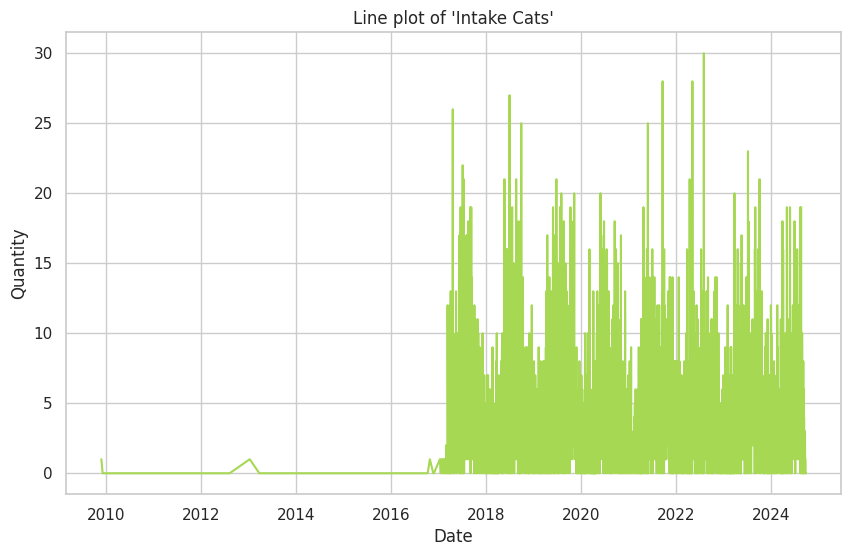

In [ ]:
# Gatos ingresados al refugio
plot_category(df_grouped, 'Intake Cats', "Line plot of 'Intake Cats'") #TO DO: smooth

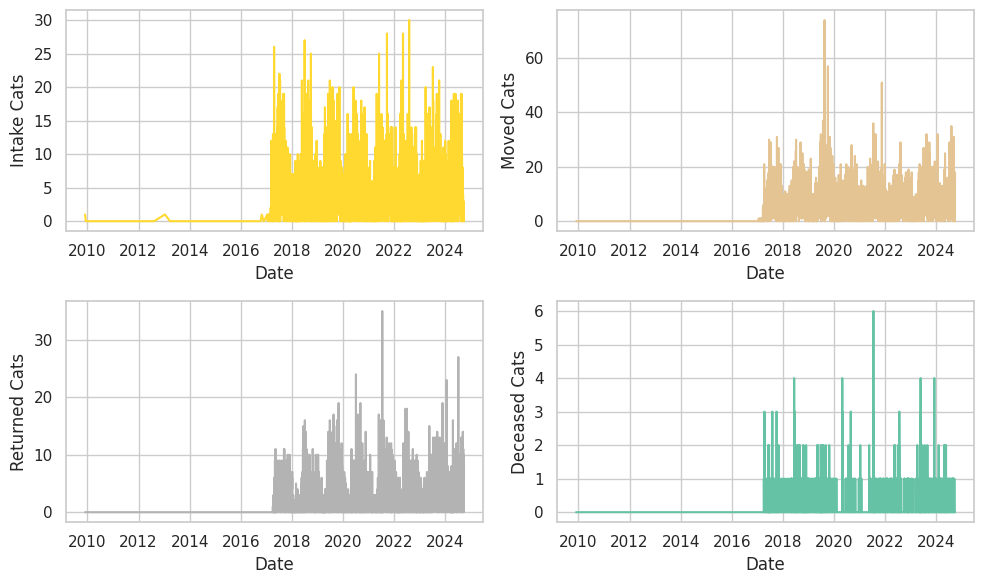

In [ ]:
# Gatos ingresados/trasladados/retornados/fallecidos
plot_cat_categories(df_grouped)

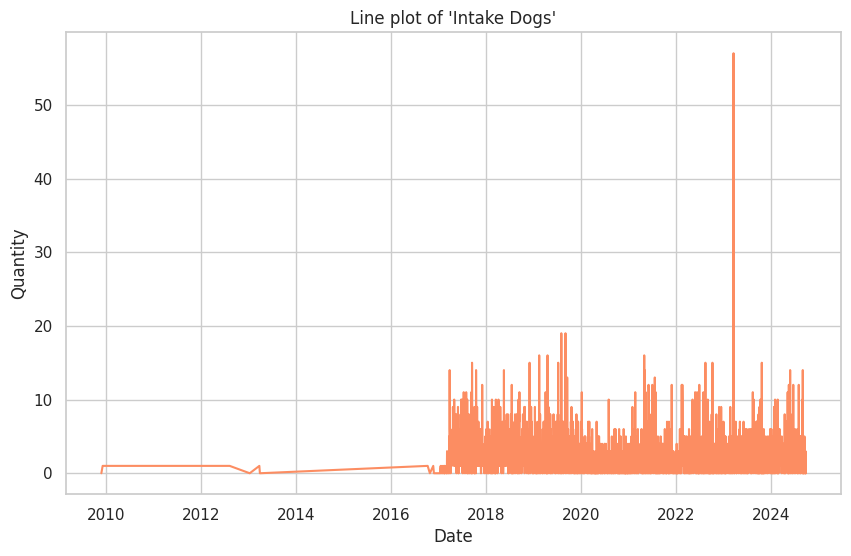

In [ ]:
# Perros ingresados al refugio
plot_category(df_grouped, 'Intake Dogs', "Line plot of 'Intake Dogs'")

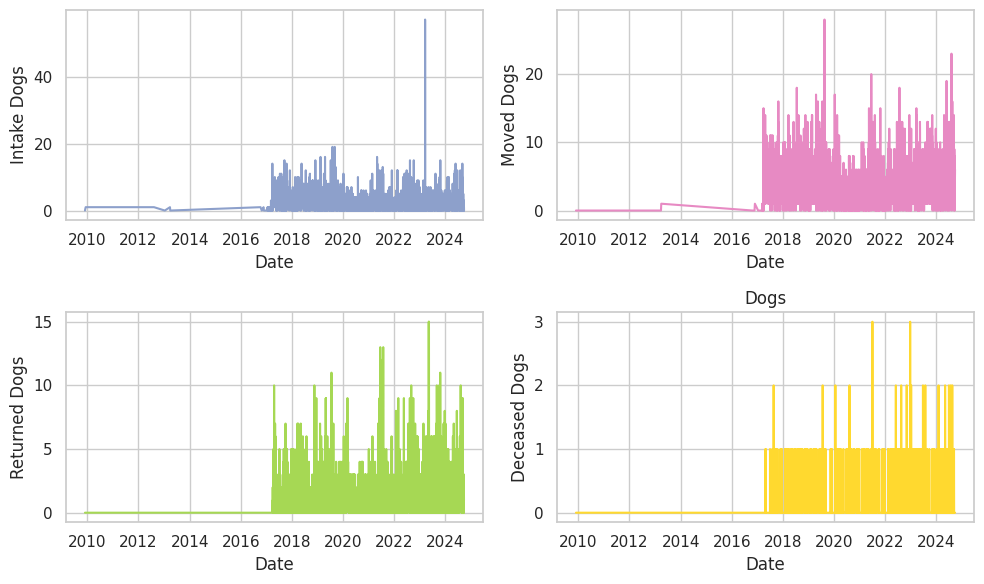

In [ ]:
# Perros ingresados/trasladados/retornados/fallecidos
plot_dog_categories(df_grouped)

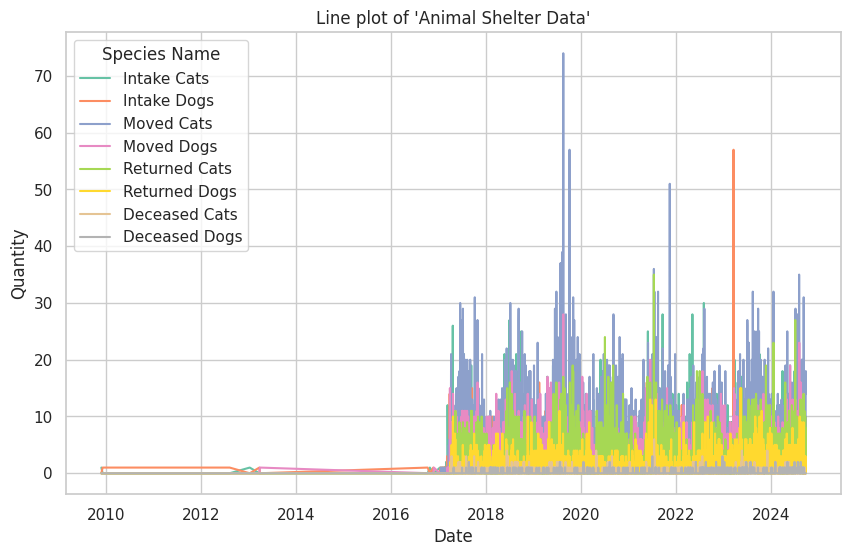

In [ ]:
# Todas las categorías
plot_series(df_grouped, "Line plot of 'Animal Shelter Data'")

## Tomando Intervalos de Tiempo

### Diario

In [ ]:
df_daily = df_grouped.resample('D').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily.shape[0], df_daily.shape[1]))
df_daily.head(10)

Cantidad de Filas: 5414
Cantidad de Columnas: 8



Species Name  Intake Cats  Intake Dogs  Moved Cats  Moved Dogs  Returned Cats  \
Date                                                                            
2009-11-28            1.0          0.0         0.0         0.0            0.0   
2009-11-29            0.0          0.0         0.0         0.0            0.0   
2009-11-30            0.0          0.0         0.0         0.0            0.0   
2009-12-01            0.0          0.0         0.0         0.0            0.0   
2009-12-02            0.0          0.0         0.0         0.0            0.0   
2009-12-03            0.0          0.0         0.0         0.0            0.0   
2009-12-04            0.0          0.0         0.0         0.0            0.0   
2009-12-05            0.0          0.0         0.0         0.0            0.0   
2009-12-06            0.0          0.0         0.0         0.0            0.0   
2009-12-07            0.0          0.0         0.0         0.0            0.0   

Species Name  Returned Dogs  Deceased Cats  Deceased Dogs  
Date                                                       
2009-11-28              0.0            0.0            0.0  
2009-11-29              0.0            0.0            0.0  
2009-11-30              0.0            0.0            0.0  
2009-12-01              0.0            0.0            0.0  
2009-12-02              0.0            0.0            0.0  
2009-12-03              0.0            0.0            0.0  
2009-12-04              0.0            0.0            0.0  
2009-12-05              0.0            0.0            0.0  
2009-12-06              0.0            0.0            0.0  
2009-12-07              0.0            0.0            0.0

In [ ]:
df_daily.head(10)

Species Name  Intake Cats  Intake Dogs  Moved Cats  Moved Dogs  Returned Cats  \
Date                                                                            
2009-11-28            1.0          0.0         0.0         0.0            0.0   
2009-11-29            0.0          0.0         0.0         0.0            0.0   
2009-11-30            0.0          0.0         0.0         0.0            0.0   
2009-12-01            0.0          0.0         0.0         0.0            0.0   
2009-12-02            0.0          0.0         0.0         0.0            0.0   
2009-12-03            0.0          0.0         0.0         0.0            0.0   
2009-12-04            0.0          0.0         0.0         0.0            0.0   
2009-12-05            0.0          0.0         0.0         0.0            0.0   
2009-12-06            0.0          0.0         0.0         0.0            0.0   
2009-12-07            0.0          0.0         0.0         0.0            0.0   

Species Name  Returned Dogs  Deceased Cats  Deceased Dogs  
Date                                                       
2009-11-28              0.0            0.0            0.0  
2009-11-29              0.0            0.0            0.0  
2009-11-30              0.0            0.0            0.0  
2009-12-01              0.0            0.0            0.0  
2009-12-02              0.0            0.0            0.0  
2009-12-03              0.0            0.0            0.0  
2009-12-04              0.0            0.0            0.0  
2009-12-05              0.0            0.0            0.0  
2009-12-06              0.0            0.0            0.0  
2009-12-07              0.0            0.0            0.0

In [ ]:
df_daily.describe()

Species Name  Intake Cats  Intake Dogs   Moved Cats   Moved Dogs  \
count         5414.000000  5414.000000  5414.000000  5414.000000   
mean             2.107130     1.299778     3.364610     1.974880   
std              3.663771     2.289683     5.320892     2.869493   
min              0.000000     0.000000     0.000000     0.000000   
25%              0.000000     0.000000     0.000000     0.000000   
50%              0.000000     0.000000     0.000000     0.000000   
75%              3.000000     2.000000     5.000000     3.000000   
max             30.000000    57.000000    74.000000    28.000000   

Species Name  Returned Cats  Returned Dogs  Deceased Cats  Deceased Dogs  
count           5414.000000    5414.000000    5414.000000    5414.000000  
mean               1.319911       0.714444       0.080163       0.047100  
std                2.668172       1.388808       0.336578       0.229454  
min                0.000000       0.000000       0.000000       0.000000  
25%                0.000000       0.000000       0.000000       0.000000  
50%                0.000000       0.000000       0.000000       0.000000  
75%                1.000000       1.000000       0.000000       0.000000  
max               35.000000      15.000000       6.000000       3.000000

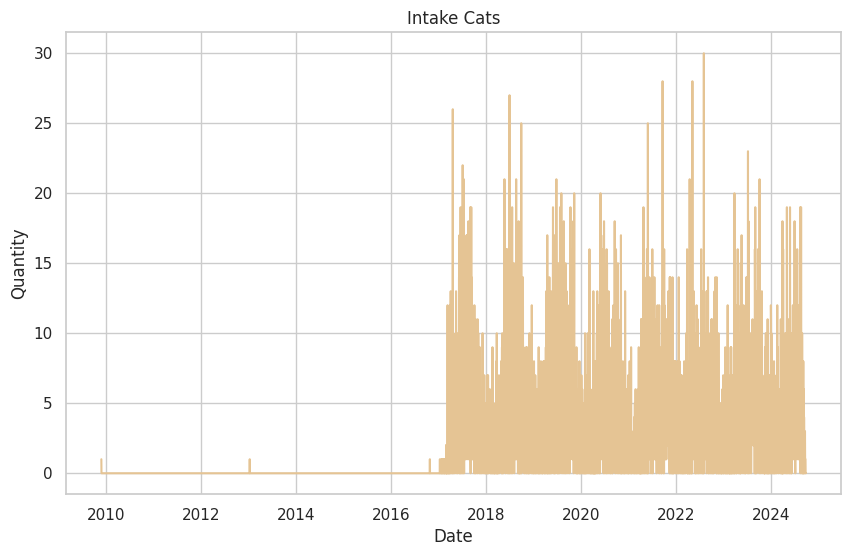

In [ ]:
plot_category(df_daily, 'Intake Cats', 'Intake Cats')

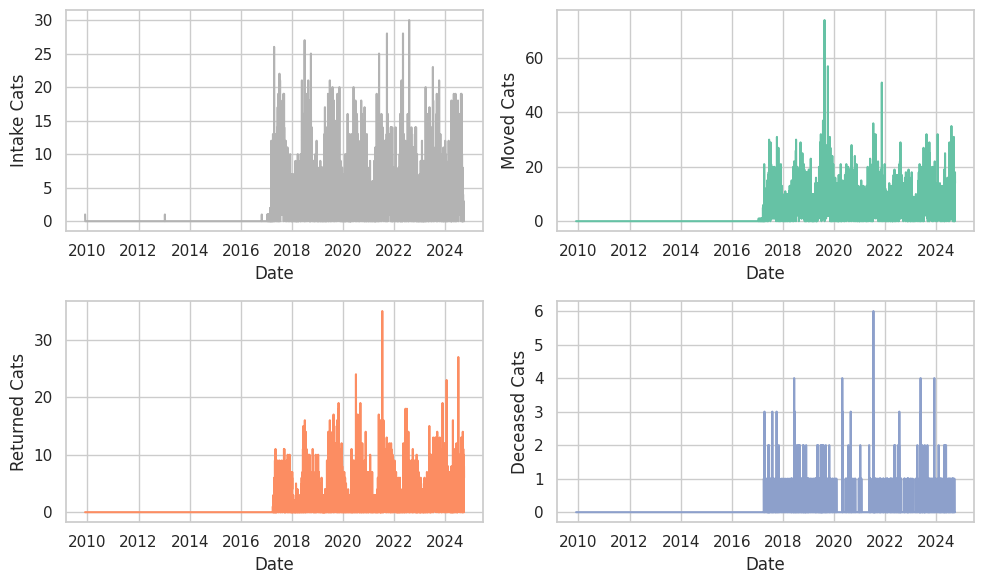

In [ ]:
plot_cat_categories(df_daily)

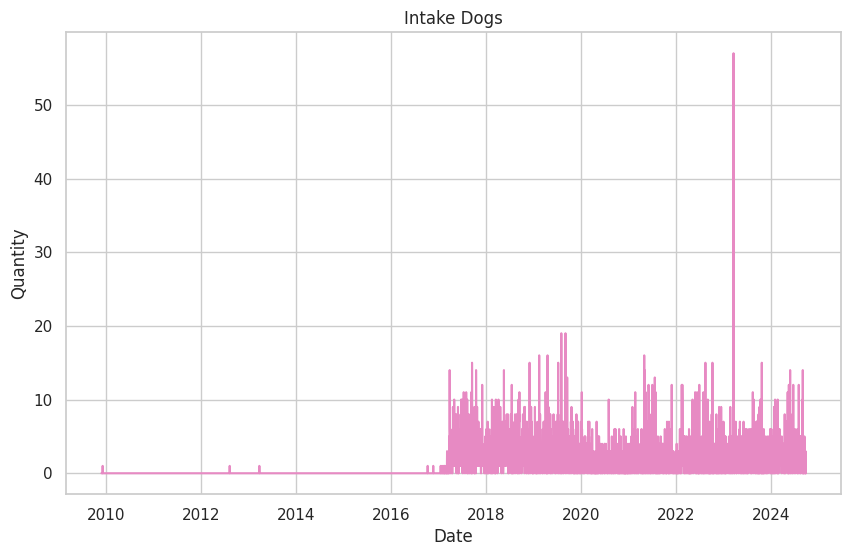

In [ ]:
plot_category(df_daily, 'Intake Dogs', 'Intake Dogs')

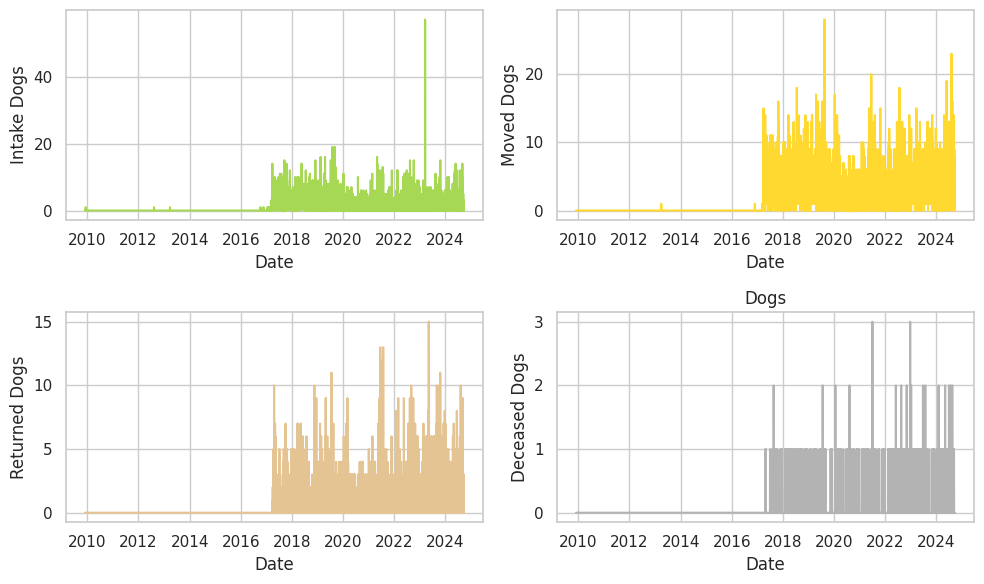

In [ ]:
plot_dog_categories(df_daily)

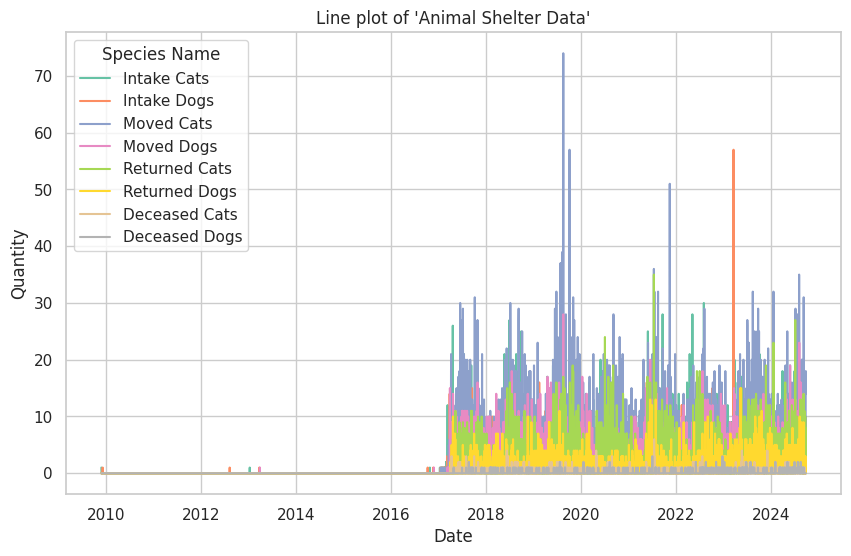

In [ ]:
plot_series(df_daily, "Line plot of 'Animal Shelter Data'")

### Semanal

In [ ]:
df_weekly = df_grouped.resample('W').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_weekly.shape[0], df_weekly.shape[1]))
df_weekly.head(10)

Cantidad de Filas: 775
Cantidad de Columnas: 8



Species Name  Intake Cats  Intake Dogs  Moved Cats  Moved Dogs  Returned Cats  \
Date                                                                            
2009-11-29            1.0          0.0         0.0         0.0            0.0   
2009-12-06            0.0          0.0         0.0         0.0            0.0   
2009-12-13            0.0          1.0         0.0         0.0            0.0   
2009-12-20            0.0          0.0         0.0         0.0            0.0   
2009-12-27            0.0          0.0         0.0         0.0            0.0   
2010-01-03            0.0          0.0         0.0         0.0            0.0   
2010-01-10            0.0          0.0         0.0         0.0            0.0   
2010-01-17            0.0          0.0         0.0         0.0            0.0   
2010-01-24            0.0          0.0         0.0         0.0            0.0   
2010-01-31            0.0          0.0         0.0         0.0            0.0   

Species Name  Returned Dogs  Deceased Cats  Deceased Dogs  
Date                                                       
2009-11-29              0.0            0.0            0.0  
2009-12-06              0.0            0.0            0.0  
2009-12-13              0.0            0.0            0.0  
2009-12-20              0.0            0.0            0.0  
2009-12-27              0.0            0.0            0.0  
2010-01-03              0.0            0.0            0.0  
2010-01-10              0.0            0.0            0.0  
2010-01-17              0.0            0.0            0.0  
2010-01-24              0.0            0.0            0.0  
2010-01-31              0.0            0.0            0.0

In [ ]:
df_weekly.describe()

Species Name  Intake Cats  Intake Dogs  Moved Cats  Moved Dogs  Returned Cats  \
count          775.000000   775.000000  775.000000  775.000000     775.000000   
mean            14.720000     9.080000   23.504516   13.796129       9.220645   
std             17.584063    10.528234   27.304336   15.149632      12.026095   
min              0.000000     0.000000    0.000000    0.000000       0.000000   
25%              0.000000     0.000000    0.000000    0.000000       0.000000   
50%              7.000000     6.000000   13.000000    8.000000       1.000000   
75%             27.000000    17.000000   44.000000   28.000000      17.000000   
max             87.000000    80.000000  127.000000   74.000000      56.000000   

Species Name  Returned Dogs  Deceased Cats  Deceased Dogs  
count            775.000000     775.000000     775.000000  
mean               4.990968       0.560000       0.329032  
std                6.216064       1.154119       0.709020  
min                0.000000       0.000000       0.000000  
25%                0.000000       0.000000       0.000000  
50%                1.000000       0.000000       0.000000  
75%                9.000000       1.000000       0.000000  
max               35.000000      10.000000       4.000000

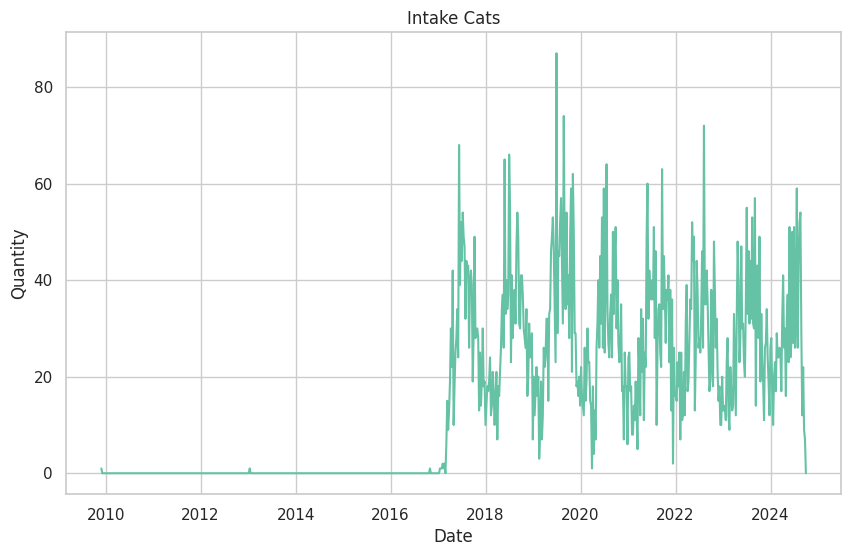

In [ ]:
plot_category(df_weekly, 'Intake Cats', 'Intake Cats')

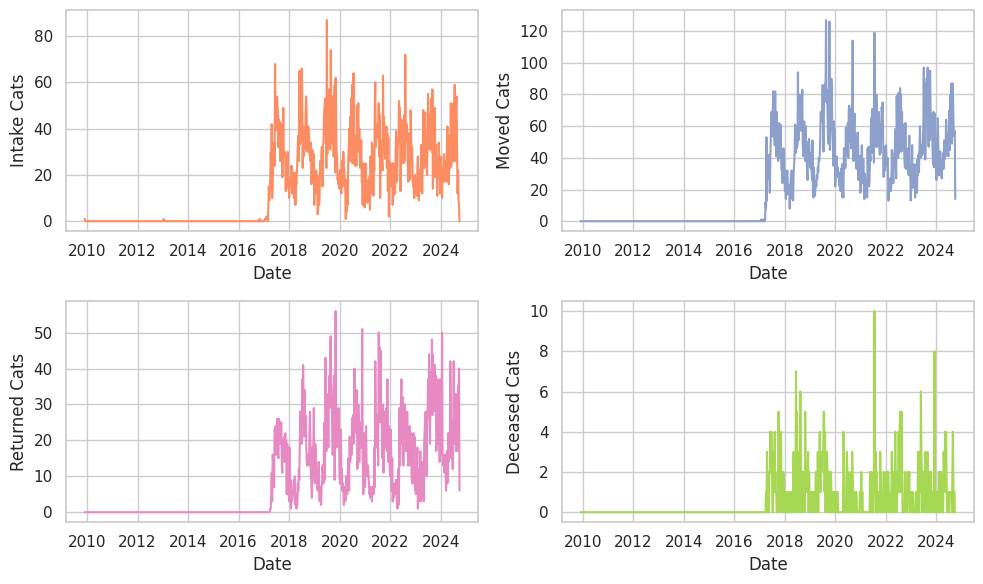

In [ ]:
plot_cat_categories(df_weekly)

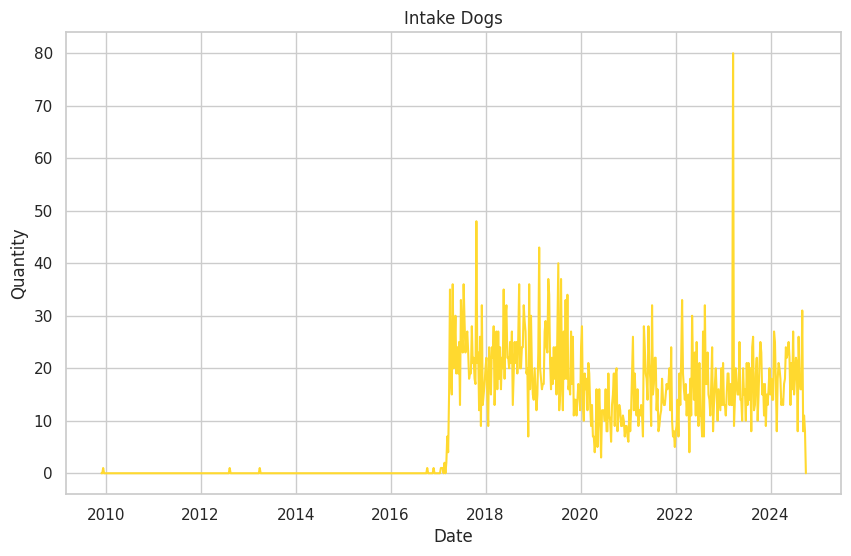

In [ ]:
plot_category(df_weekly, 'Intake Dogs', 'Intake Dogs')

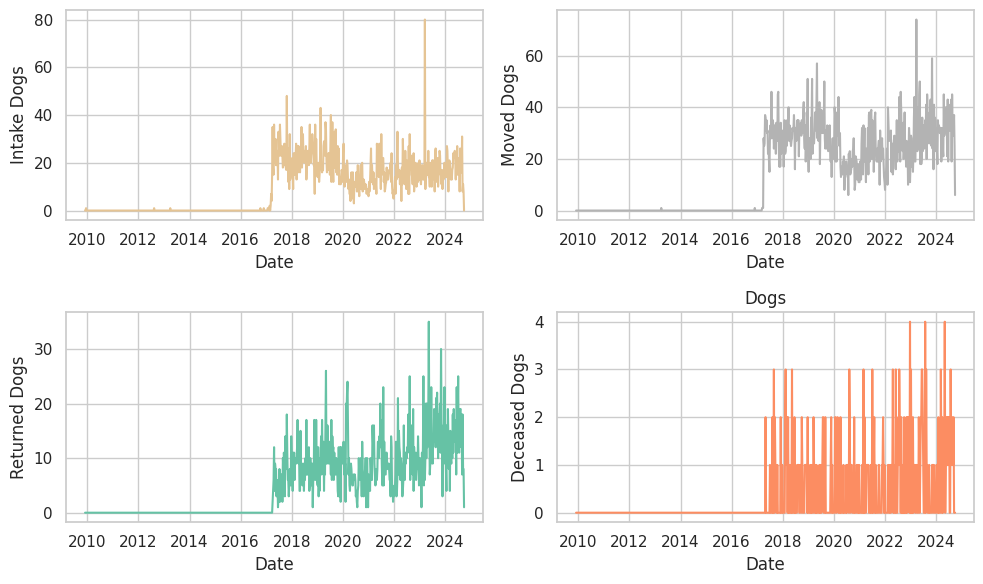

In [ ]:
plot_dog_categories(df_weekly)

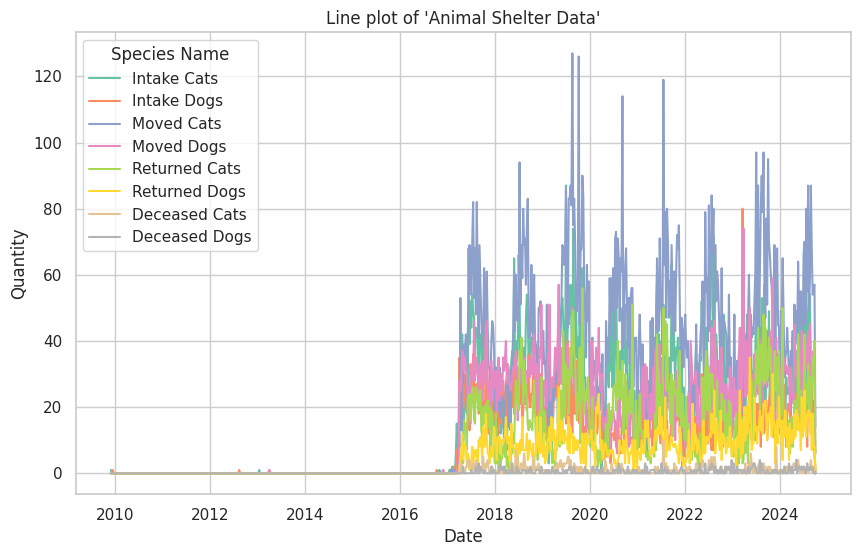

In [ ]:
plot_series(df_weekly, "Line plot of 'Animal Shelter Data'")

### Diario 2017 en Adelante

In [103]:
df_daily_2017 = df_daily[df_daily.index >= '2017-01-01']

In [104]:
df_daily_2017.describe()

Species Name  Intake Cats  Intake Dogs   Moved Cats   Moved Dogs  \
count         2823.000000  2823.000000  2823.000000  2823.000000   
mean             4.040028     2.490967     6.452710     3.786752   
std              4.235221     2.662409     5.862814     2.988498   
min              0.000000     0.000000     0.000000     0.000000   
25%              1.000000     1.000000     2.000000     2.000000   
50%              3.000000     2.000000     5.000000     3.000000   
75%              6.000000     3.000000     9.000000     5.000000   
max             30.000000    57.000000    74.000000    28.000000   

Species Name  Returned Cats  Returned Dogs  Deceased Cats  Deceased Dogs  
count           2823.000000    2823.000000    2823.000000    2823.000000  
mean               2.531350       1.370174       0.153737       0.090329  
std                3.253901       1.673592       0.453851       0.311580  
min                0.000000       0.000000       0.000000       0.000000  
25%                0.000000       0.000000       0.000000       0.000000  
50%                1.000000       1.000000       0.000000       0.000000  
75%                4.000000       2.000000       0.000000       0.000000  
max               35.000000      15.000000       6.000000       3.000000

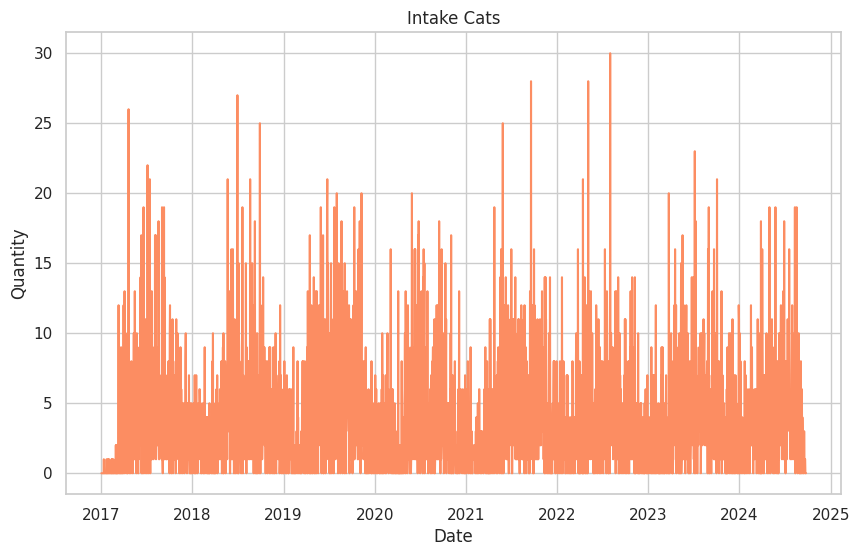

In [106]:
plot_category(df_daily_2017, 'Intake Cats', 'Intake Cats')

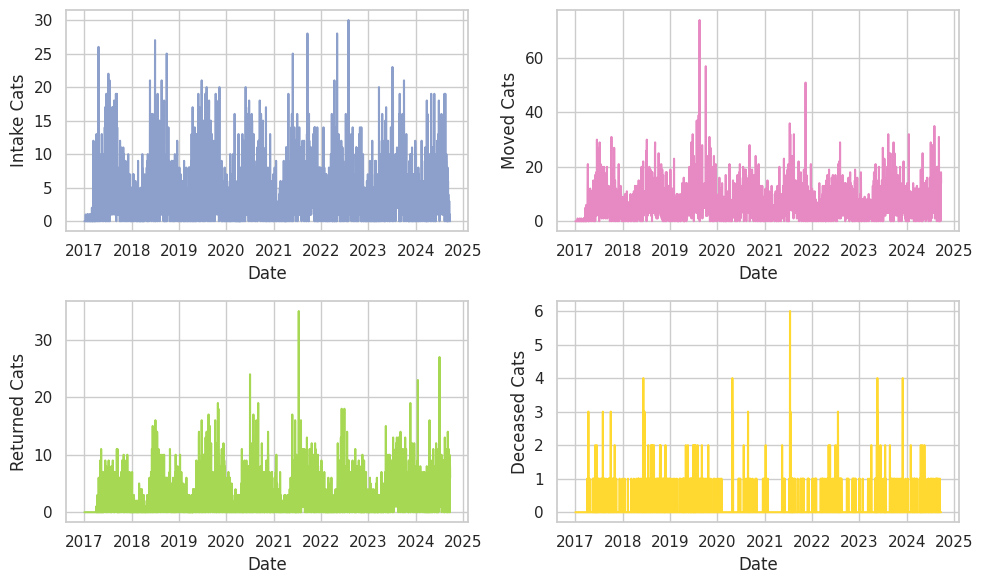

In [107]:
plot_cat_categories(df_daily_2017)

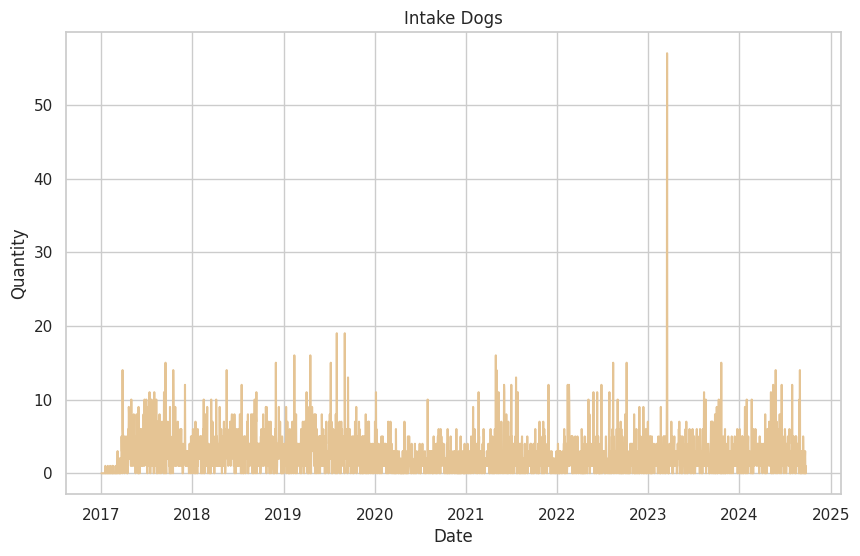

In [108]:
plot_category(df_daily_2017, 'Intake Dogs', 'Intake Dogs')

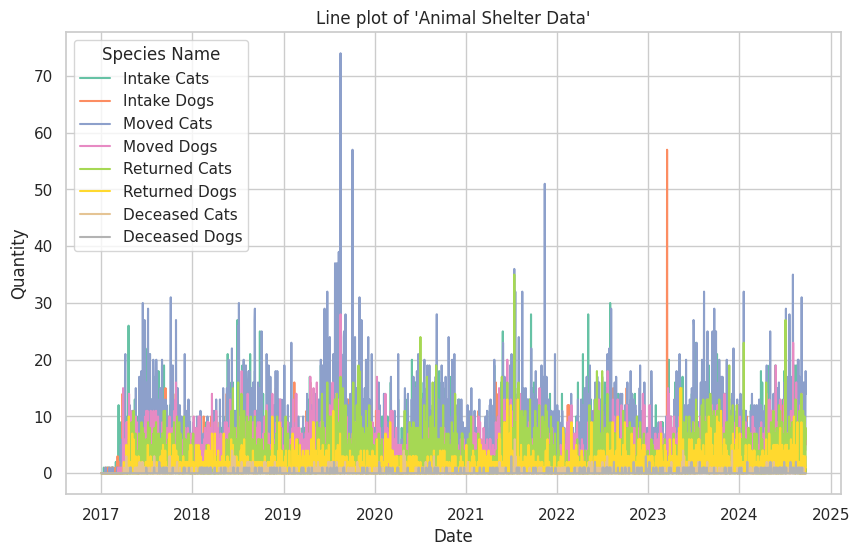

In [109]:
plot_series(df_daily_2017, "Line plot of 'Animal Shelter Data'")

## Variación de los Datos

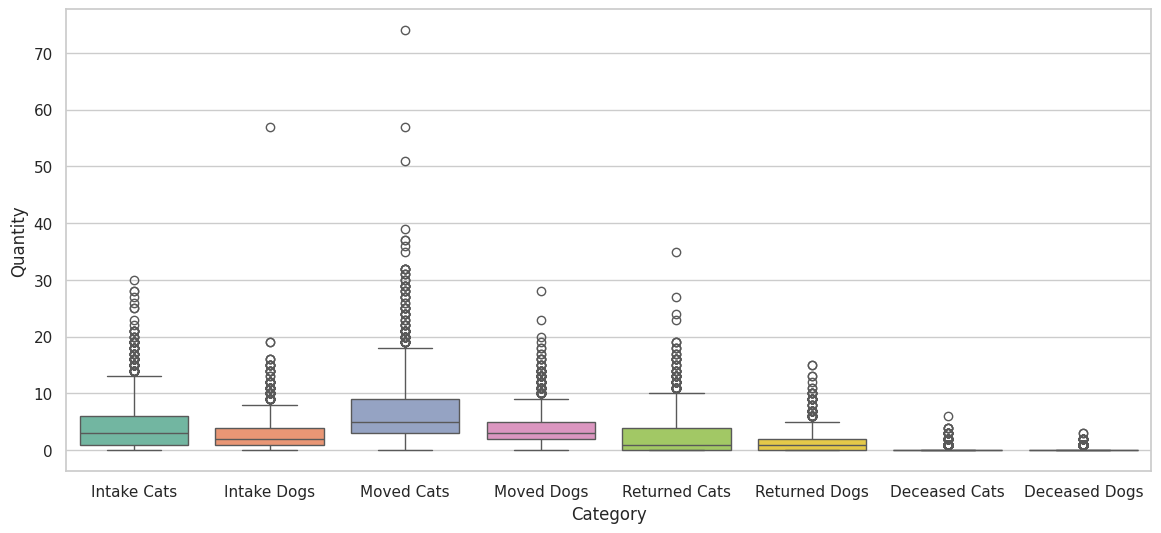

In [ ]:
boxplot(df_grouped, 'Comparison of the original categories')

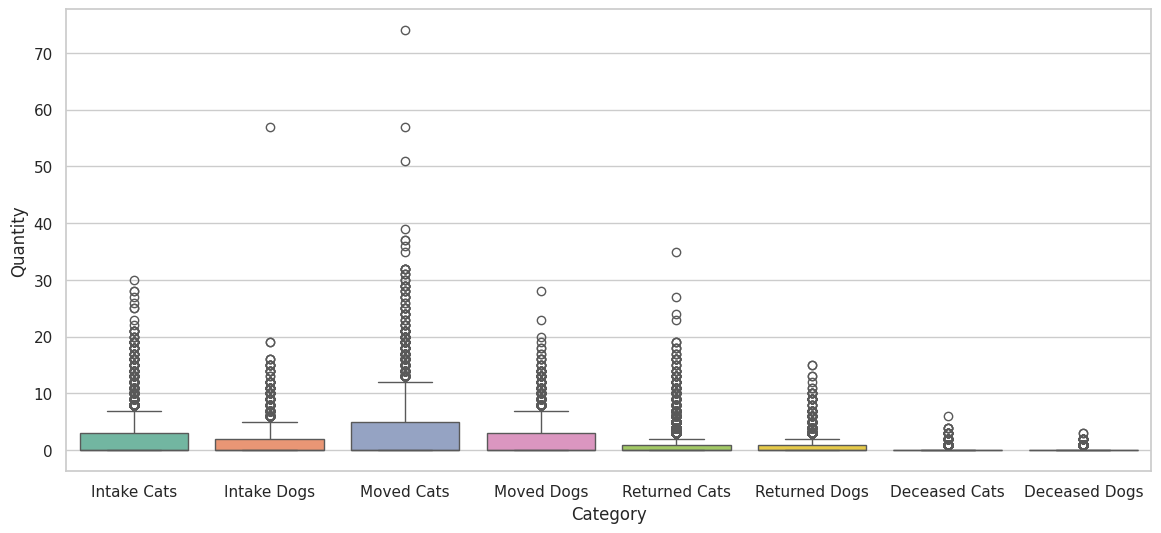

In [ ]:
boxplot(df_daily, 'Comparison of the daily categories')

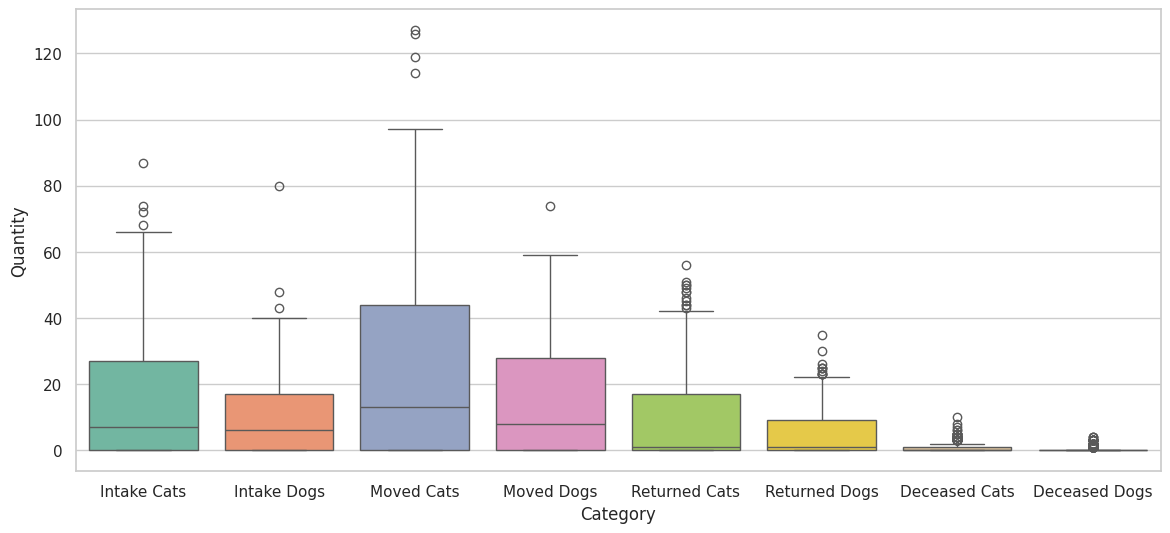

In [ ]:
boxplot(df_weekly, 'Comparison of the weekly categories')

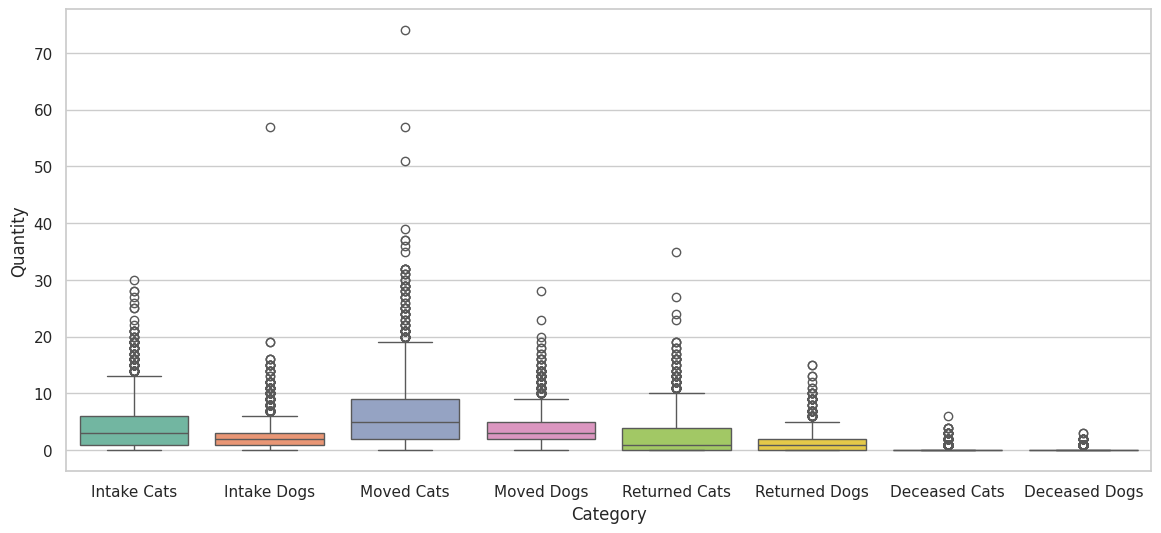

In [110]:
boxplot(df_daily_2017, 'Comparison of the daily categories after 2017')

## Autocorrelación

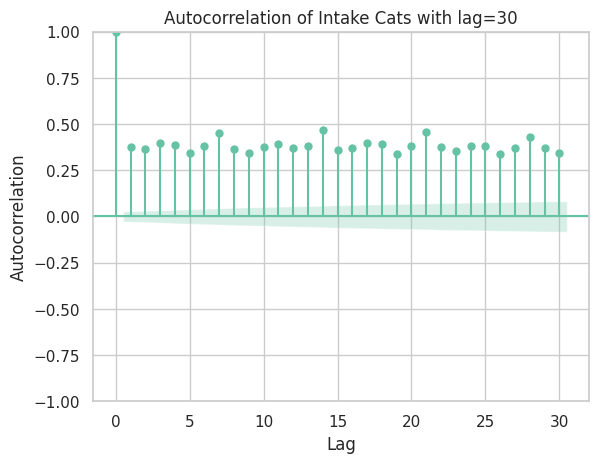

In [ ]:
plot_autocorrelation(df_daily, 'Intake Cats', 30)

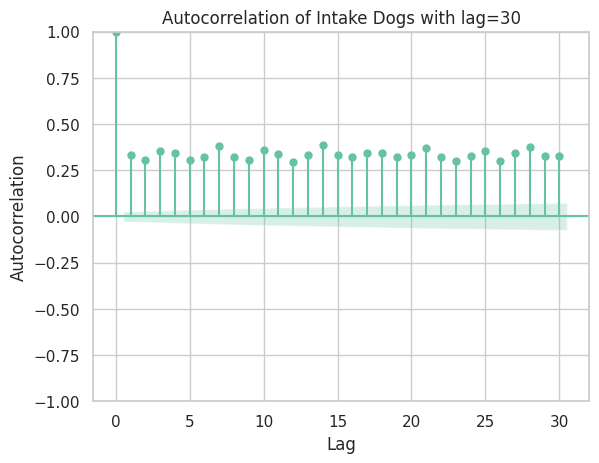

In [ ]:
plot_autocorrelation(df_daily, 'Intake Dogs', 30)

## Desde el 2017 en Adelante

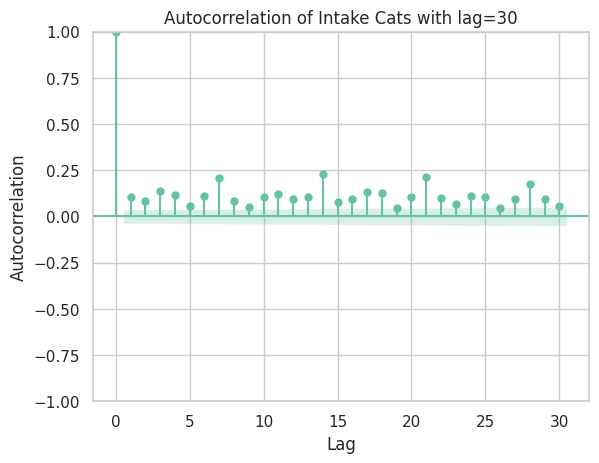

In [112]:
plot_autocorrelation(df_daily_2017, 'Intake Cats', 30)

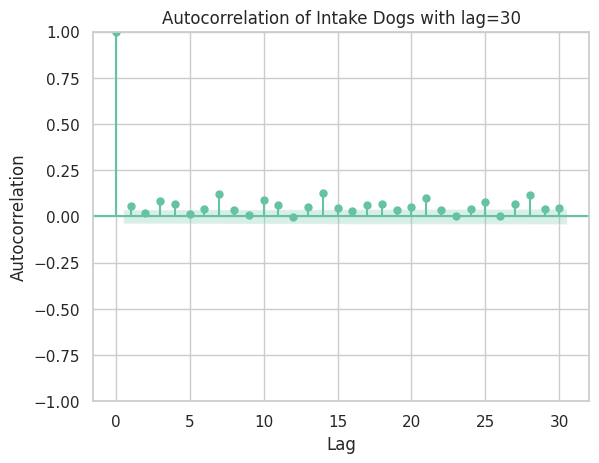

In [113]:
plot_autocorrelation(df_daily_2017, 'Intake Dogs', 30)

# Preparación de Datos

In [114]:
# Eliminar los valores anteriores a 2017
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily_2017.shape[0], df_daily_2017.shape[1]))

Cantidad de Filas: 2823
Cantidad de Columnas: 8



In [ ]:
# Definir el número de muestras de entrenamiento, validación y prueba

num_train_samples = int(0.6 * df_daily_2017.shape[0])
num_val_samples = int(0.2 * df_daily_2017.shape[0])
num_test_samples = df_daily_2017.shape[0] - num_train_samples - num_val_samples

print("Train Samples: %d\nValidation Samples: %d\nTest Samples: %d\n" % (num_train_samples, num_val_samples, num_test_samples))

Train Samples: 1693
Validation Samples: 564
Test Samples: 566



## Preparación para "Intake Cats" 🐱

In [ ]:
data = df_daily_2017[['Intake Cats', 'Intake Dogs', 'Moved Cats', 'Moved Dogs', 'Returned Cats', 'Returned Dogs']].values
intake_cats = df_daily_2017['Intake Cats'].values

# separar los datos en entrenamiento, validación y prueba
x_train = data[:num_train_samples]
y_train = intake_cats[:num_train_samples]
x_val = data[num_train_samples:num_train_samples + num_val_samples]
y_val = intake_cats[num_train_samples:num_train_samples + num_val_samples]
x_test = data[-num_test_samples:]
y_test = intake_cats[-num_test_samples:]

print("Train Data Shape: %s" % str(x_train.shape))
print("Validation Data Shape: %s" % str(x_val.shape))
print("Test Data Shape: %s" % str(x_test.shape))

Train Data Shape: (1693, 6)
Validation Data Shape: (564, 6)
Test Data Shape: (566, 6)


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [115]:
sequence_length = 15  # mira hasta 15 días atrás
sampling_rate = 1 # toma una muestra cada día
delay = sampling_rate * (sequence_length + 1 - 1)

# El delay es el número de pasos de tiempo entre la secuencia de entrada (los datos)
# y el punto en el futuro que desea predecir (el objetivo). Garantiza que para cada
# secuencia de datos de entrada, el objetivo sea el valor de temperatura después de un cierto retraso en el futuro.

# Esto calcula el delay como un múltiplo de la frecuencia de muestreo.
# El valor secuencia_longitud + 24 - 1 representa una combinación de la longitud
# de la secuencia y una ventana futura adicional de 24 pasos de tiempo (menos 1 para indexar correctamente).

batch_size = 32

In [116]:
train_dataset = timeseries_dataset_from_array(
	x_train_scaled[:-delay],
	targets = y_train[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

val_dataset = timeseries_dataset_from_array(
	x_val_scaled[:-delay],
	targets = y_val[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

test_dataset = timeseries_dataset_from_array(
	x_test_scaled[:-delay],
	targets = y_test[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

In [117]:
for x, y in train_dataset.take(1):
  print(x)
  print(y)

tf.Tensor(
[[[0.         0.15789474 0.04054054 0.14285714 0.02857143 0.15384615]
  [0.         0.31578947 0.04054054 0.21428571 0.11428571 0.30769231]
  [0.         0.84210526 0.01351351 0.17857143 0.         0.30769231]
  ...
  [0.03703704 0.         0.02702703 0.17857143 0.02857143 0.        ]
  [0.         0.05263158 0.02702703 0.03571429 0.02857143 0.        ]
  [0.11111111 0.21052632 0.         0.07142857 0.05714286 0.        ]]

 [[0.11111111 0.21052632 0.06756757 0.17857143 0.11428571 0.        ]
  [0.07407407 0.15789474 0.04054054 0.14285714 0.         0.07692308]
  [0.33333333 0.10526316 0.08108108 0.14285714 0.11428571 0.        ]
  ...
  [0.03703704 0.05263158 0.05405405 0.14285714 0.02857143 0.07692308]
  [0.14814815 0.15789474 0.09459459 0.14285714 0.02857143 0.07692308]
  [0.03703704 0.10526316 0.12162162 0.5        0.17142857 0.76923077]]

 [[0.07407407 0.15789474 0.09459459 0.32142857 0.28571429 0.07692308]
  [0.         0.05263158 0.06756757 0.14285714 0.05714286 0.230

## Preparación para "Intake Dogs" 🐶

In [ ]:
data_dogs = df_daily_2017[['Intake Dogs', 'Intake Cats', 'Moved Cats', 'Moved Dogs', 'Returned Cats', 'Returned Dogs', 'Deceased Cats', 'Deceased Dogs']].values
intake_dogs = df_daily_2017['Intake Dogs'].values

# separar los datos en entrenamiento, validación y prueba
x_train_dog = data_dogs[:num_train_samples]
y_train_dog = intake_dogs[:num_train_samples]
x_val_dog = data_dogs[num_train_samples:num_train_samples + num_val_samples]
y_val_dog = intake_dogs[num_train_samples:num_train_samples + num_val_samples]
x_test_dog = data_dogs[-num_test_samples:]
y_test_dog = intake_dogs[-num_test_samples:]

print("Train Data Shape: %s" % str(x_train_dog.shape))
print("Validation Data Shape: %s" % str(x_val_dog.shape))
print("Test Data Shape: %s" % str(x_test_dog.shape))

Train Data Shape: (1693, 8)
Validation Data Shape: (564, 8)
Test Data Shape: (566, 8)


In [ ]:
scaler_dogs = MinMaxScaler()
x_train_dog_scaled = scaler_dogs.fit_transform(x_train_dog)
x_val_dog_scaled = scaler_dogs.transform(x_val_dog)
x_test_dog_scaled = scaler_dogs.transform(x_test_dog)

In [ ]:
train_dog_dataset = timeseries_dataset_from_array(
	x_train_dog_scaled[:-delay],
	targets = y_train_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

val_dog_dataset = timeseries_dataset_from_array(
	x_val_dog_scaled[:-delay],
	targets = y_val_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

test_dog_dataset = timeseries_dataset_from_array(
	x_test_dog_scaled[:-delay],
	targets = y_test_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

# Definición Modelos

In [ ]:
optimizer = "adam"
loss = "mean_squared_error"
metrics = ["mean_squared_error", "mean_absolute_error"]

In [118]:
def simple_rnn_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.SimpleRNN(32, return_sequences=True),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.SimpleRNN(32),
		tf.keras.layers.Dense(1)
	])

	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

def lstm_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.LSTM(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.LSTM(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

def gru_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

## Otros Modelos

In [127]:
def gru_model_2(input_shape: tuple):
  model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.GRU(64, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GRU(64, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1)
  ])
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  return model

# Predicción de 'Intake Cats' 🙀

- sequence_length = 30
- sampling_rate = 1

In [ ]:
input_shape = (sequence_length, x_train.shape[-1])
print("Input Shape: %s" % str(input_shape))

Input Shape: (30, 6)


## Simple RNN

In [ ]:
simple_rnn = simple_rnn_model(input_shape)
simple_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 32)              │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,361 (13.13 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_simple = [
	tf.keras.callbacks.ModelCheckpoint(f'drive/MyDrive/models/cats/best_simple_{get_time()}.keras', save_best_only=True)
]

In [ ]:
simple_history = simple_rnn.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callbacks_simple
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 25.9497 - mean_absolute_error: 3.4977 - mean_squared_error: 25.9497 - val_loss: 16.6497 - val_mean_absolute_error: 3.2528 - val_mean_squared_error: 16.6497
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 19.1453 - mean_absolute_error: 3.3256 - mean_squared_error: 19.1453 - val_loss: 16.5156 - val_mean_absolute_error: 3.2322 - val_mean_squared_error: 16.5156
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 18.9655 - mean_absolute_error: 3.2820 - mean_squared_error: 18.9655 - val_loss: 16.3471 - val_mean_absolute_error: 3.2061 - val_mean_squared_error: 16.3471
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 17.4526 - mean_absolute_error: 3.1403 - mean_squared_error: 17.4526 - val_loss: 15.7068 - val_mean_absolute_error: 3.0447 - val_mean_squared_error: 15.7068
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 16.4753 - mean_absolute_error: 2.9826 - mean_squared_error: 16.4753 - val_loss: 1

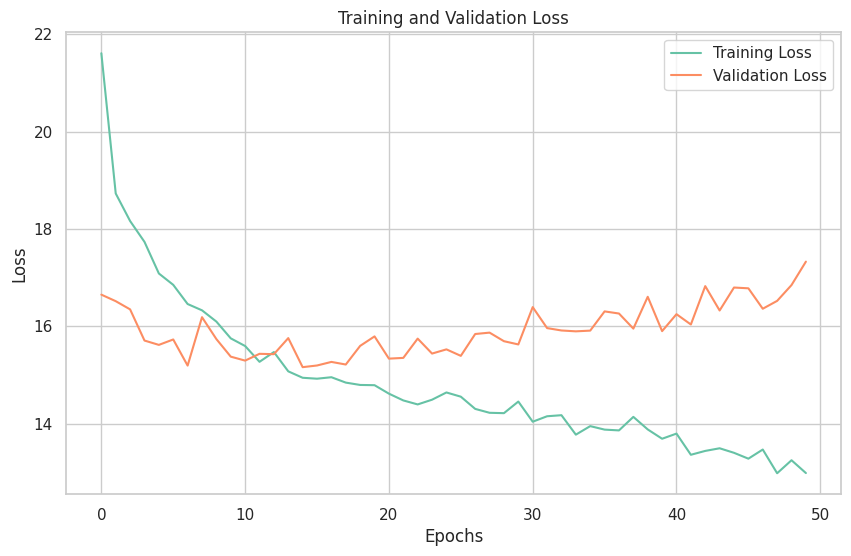

In [ ]:
plot_loss(simple_history)

In [ ]:
best_simple_model = tf.keras.models.load_model('models/cats/best_simple_2024-09-26_19-15.keras')
simple_cat_evaluation = best_simple_model.evaluate(test_dataset)
print("Test MSE: %.4f" % simple_cat_evaluation[1])
print("Test MAE: %.4f" % simple_cat_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.2875 - mean_absolute_error: 2.9652 - mean_squared_error: 15.2875
Test MSE: 17.5954
Test MAE: 3.1433


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


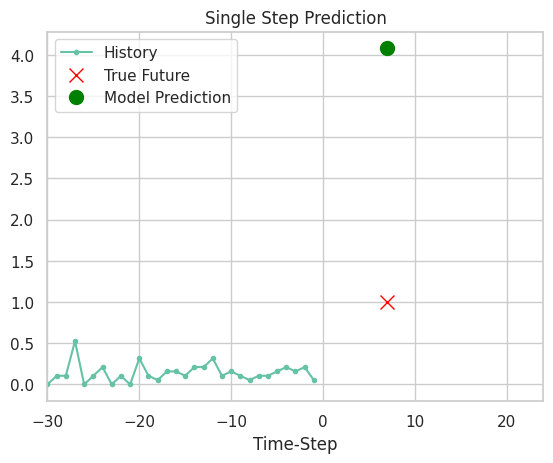

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


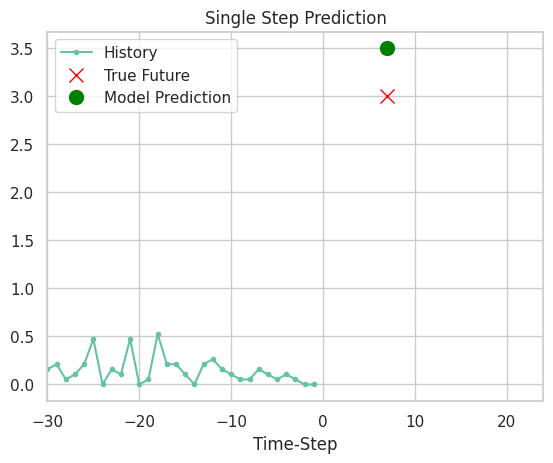

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


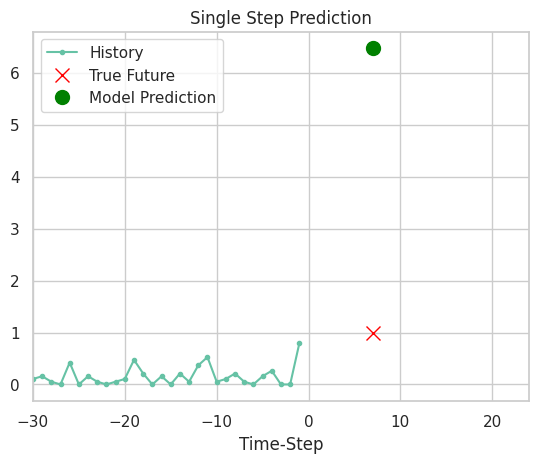

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


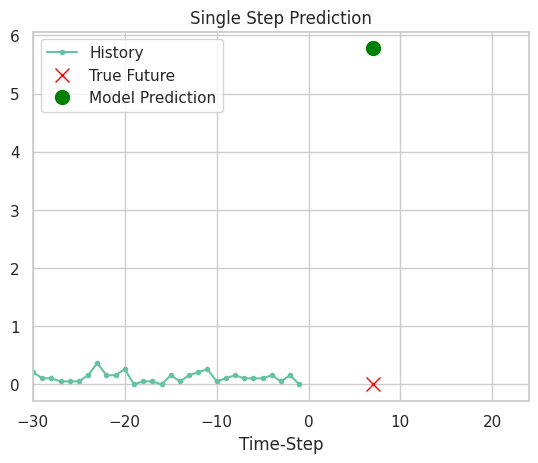

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


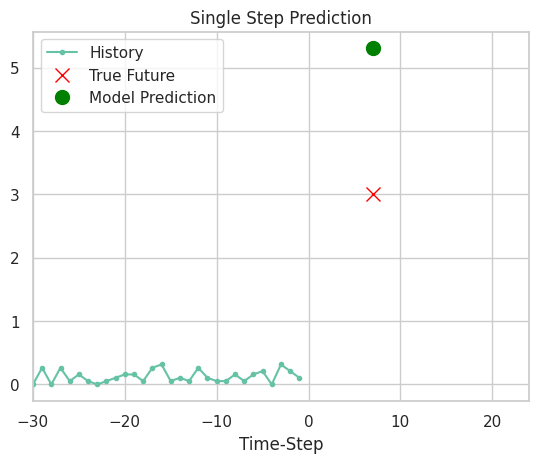

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


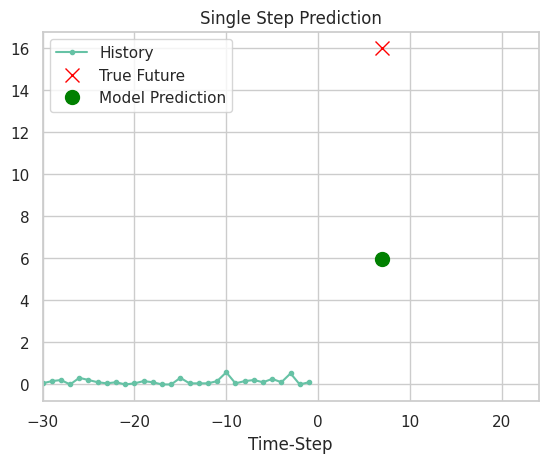

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


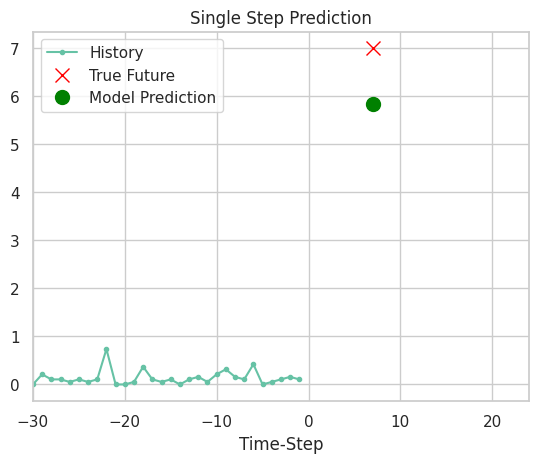

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


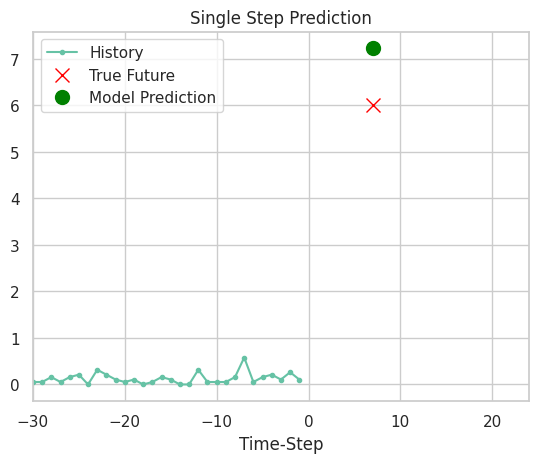

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


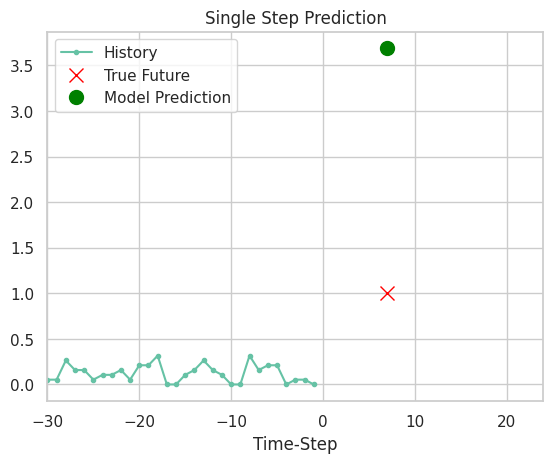

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


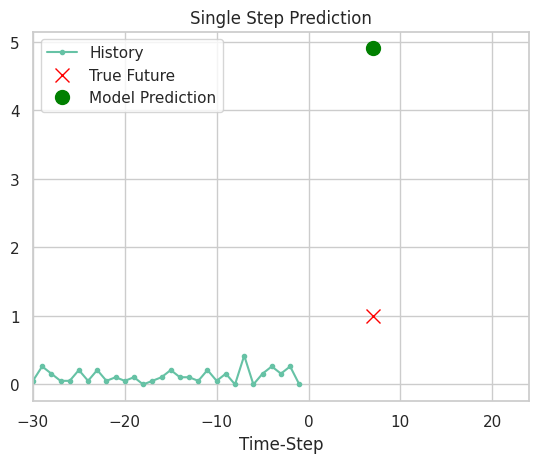

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


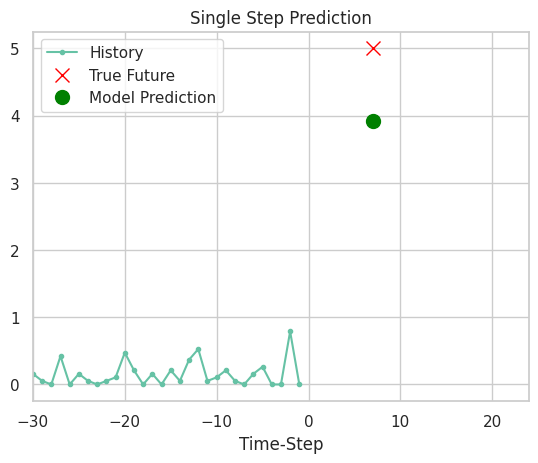

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


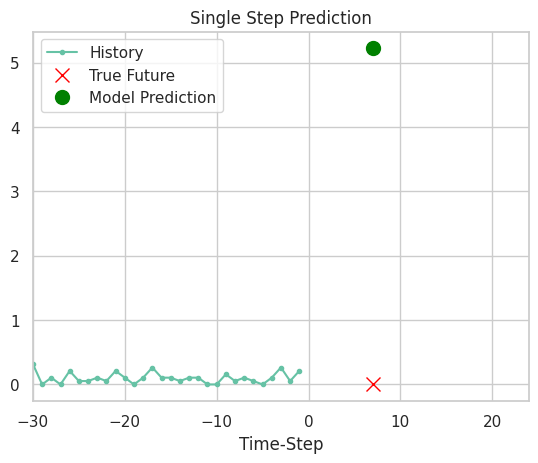

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


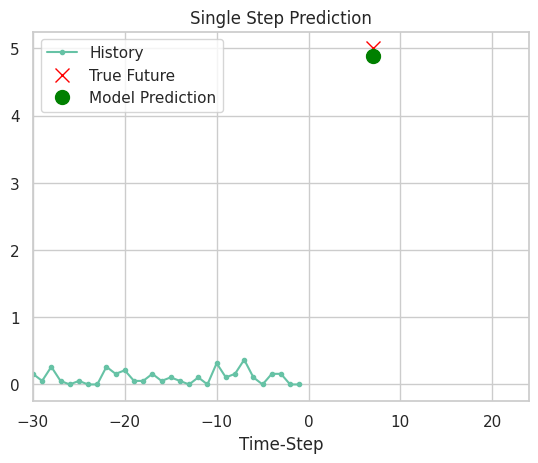

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


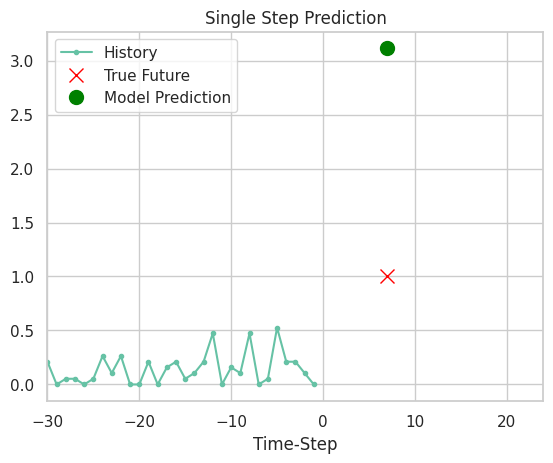

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


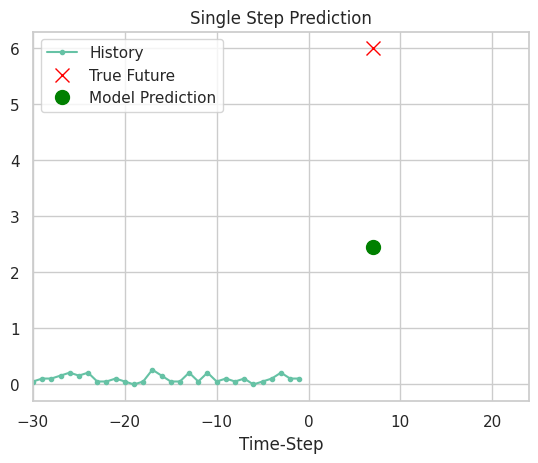

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


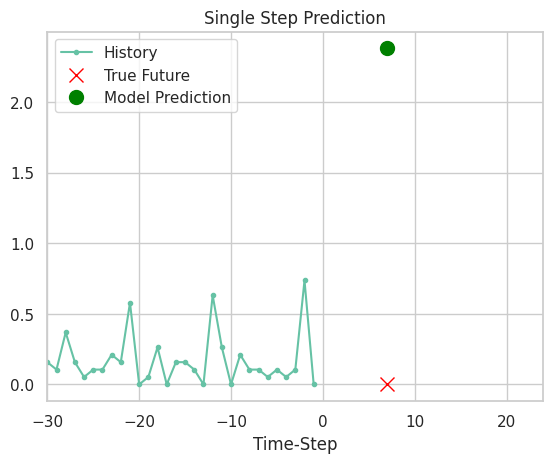

In [ ]:
for x, y in test_dataset.take(20):
    show_preds(
        [x[0][:, 1].numpy(), y[0].numpy(), best_simple_model.predict(x)[0]],
        7,
        "Single Step Prediction",
    )

## LSTM

In [ ]:
lstm = lstm_model(input_shape)
lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 32)              │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,345 (52.13 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_lstm = [
	tf.keras.callbacks.ModelCheckpoint(f'models/cats/best_lstm_{get_time()}.keras', save_best_only=True)
]

In [ ]:
lstm_history = lstm.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callbacks_lstm
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 29.8161 - mean_absolute_error: 3.6620 - mean_squared_error: 29.8161 - val_loss: 16.6830 - val_mean_absolute_error: 3.2585 - val_mean_squared_error: 16.6830
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 18.5395 - mean_absolute_error: 3.2965 - mean_squared_error: 18.5395 - val_loss: 16.2719 - val_mean_absolute_error: 3.1303 - val_mean_squared_error: 16.2719
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 18.6806 - mean_absolute_error: 3.2316 - mean_squared_error: 18.6806 - val_loss: 16.2895 - val_mean_absolute_error: 3.1751 - val_mean_squared_error: 16.2895
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 17.3403 - mean_absolute_error: 3.1630 - mean_squared_error: 17.3403 - val_loss: 16.2745 - val_mean_absolute_error: 3.1817 - val_mean_squared_error: 16.2745
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 17.6991 - mean_absolute_error: 3.1596 - mean_squared_error: 17.6991 - val_loss: 1

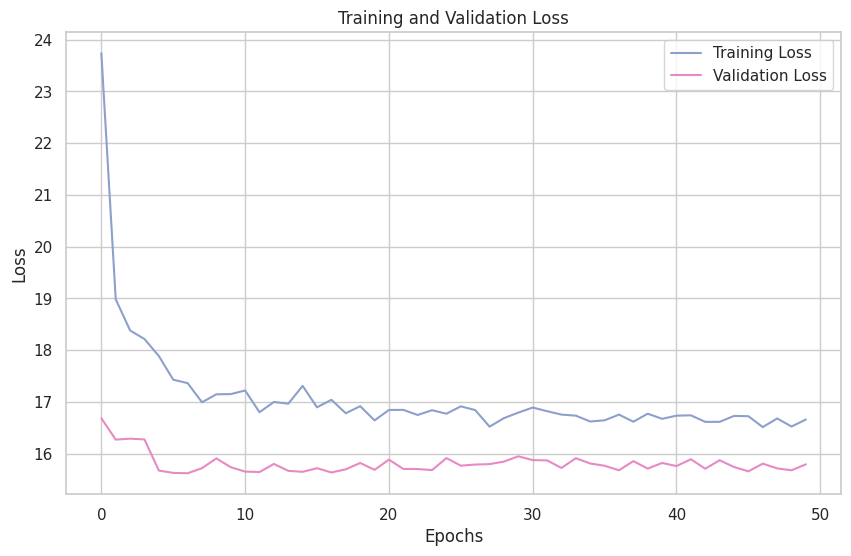

In [ ]:
plot_loss(lstm_history)

In [ ]:
best_lstm_model = tf.keras.models.load_model('models/cats/best_lstm_2024-09-26_20-04.keras')
lstm_cat_evaluation = best_lstm_model.evaluate(test_dataset)
print("Test MSE: %.4f" % lstm_cat_evaluation[1])
print("Test MAE: %.4f" % lstm_cat_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.2493 - mean_absolute_error: 2.9630 - mean_squared_error: 15.2493
Test MSE: 17.5108
Test MAE: 3.1760


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


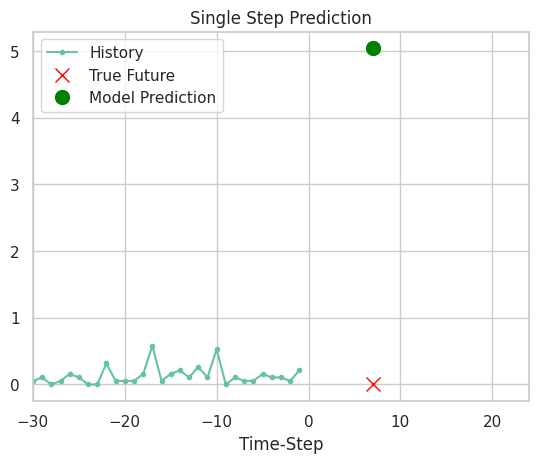

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


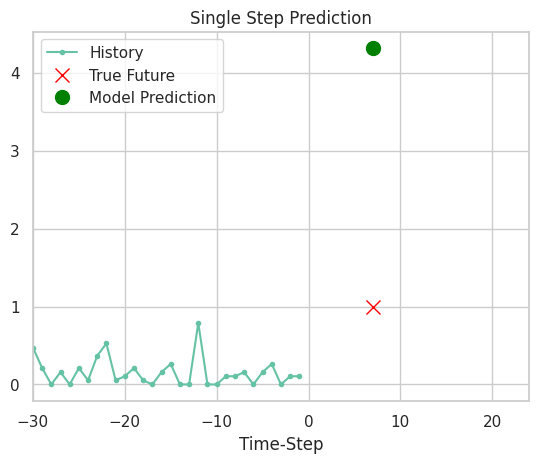

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


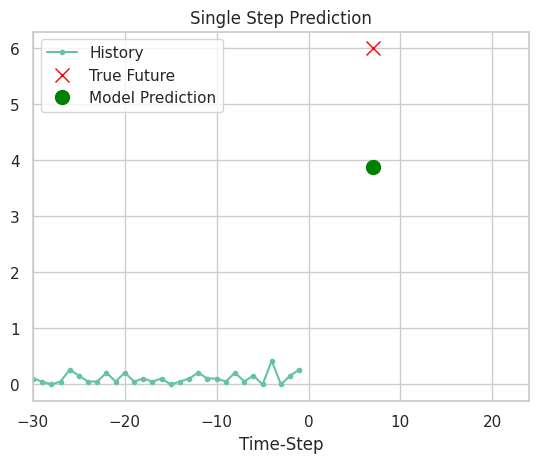

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


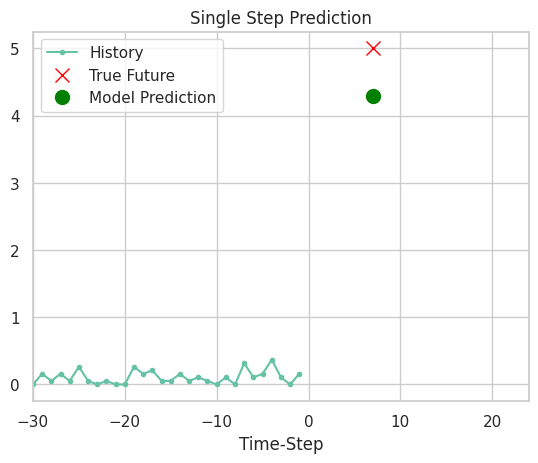

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


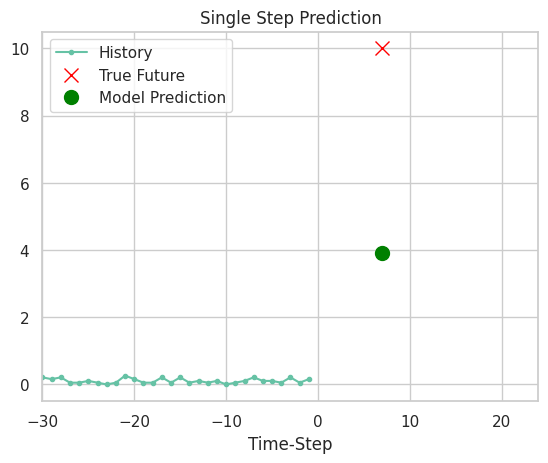

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


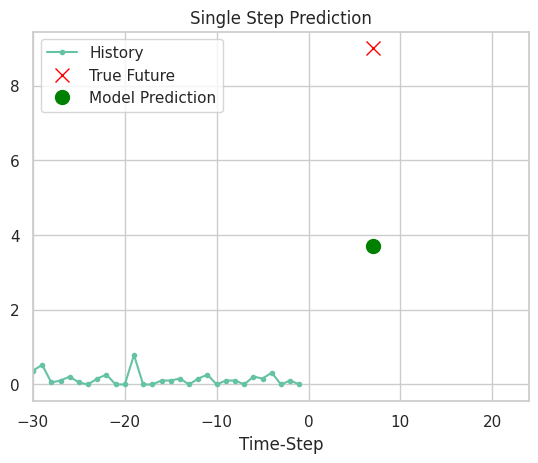

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


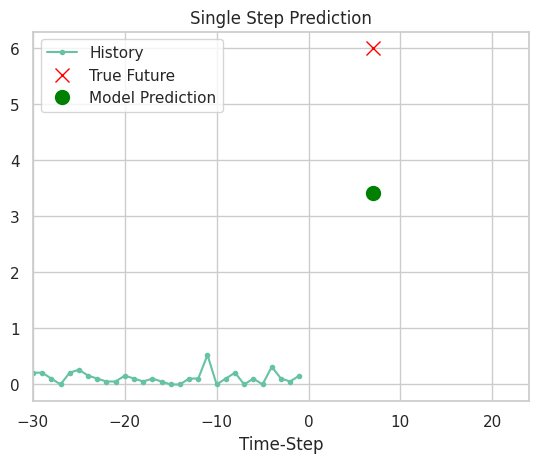

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


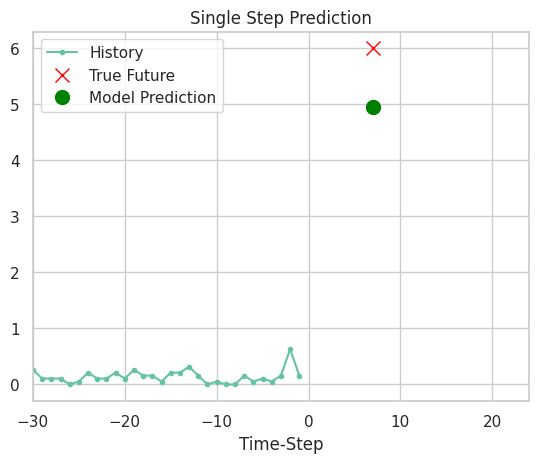

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


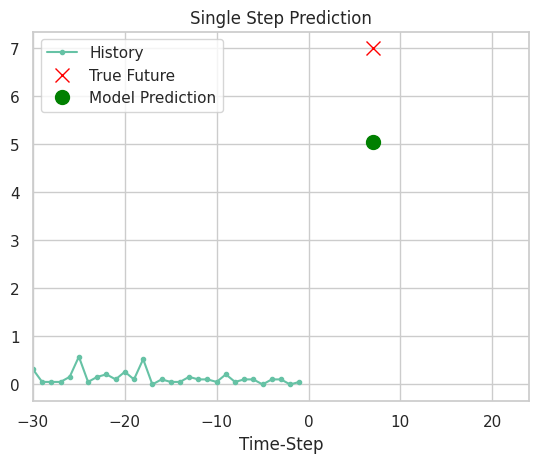

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


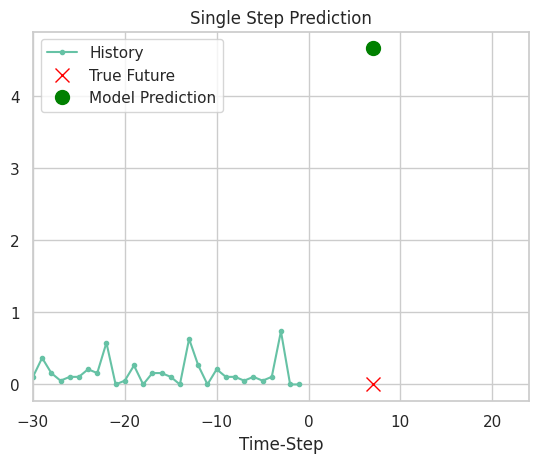

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


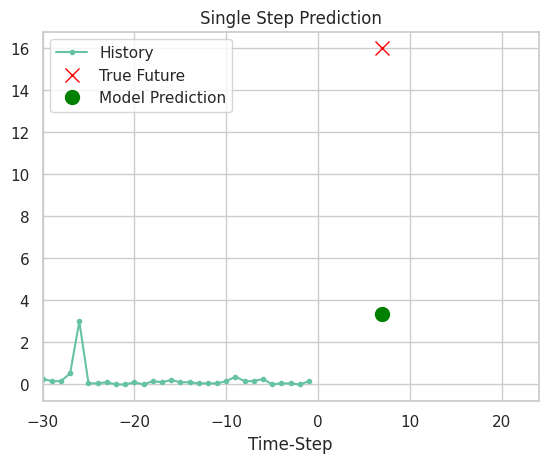

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


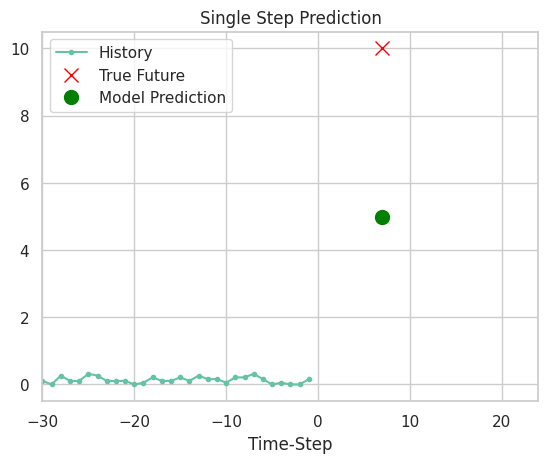

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


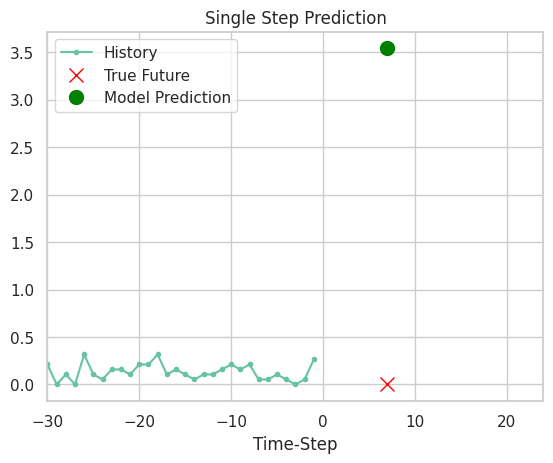

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


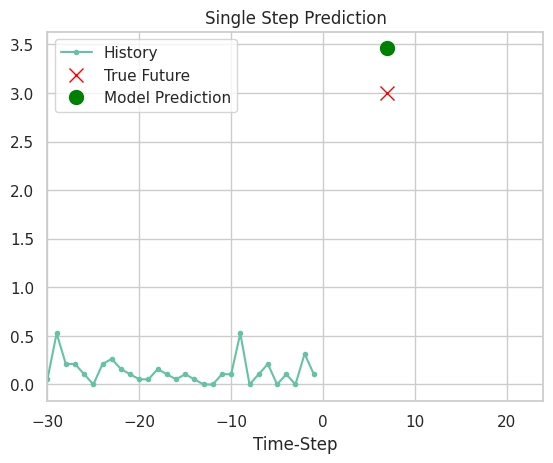

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


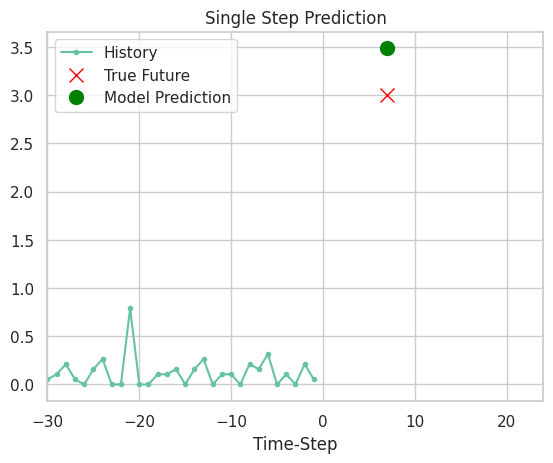

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


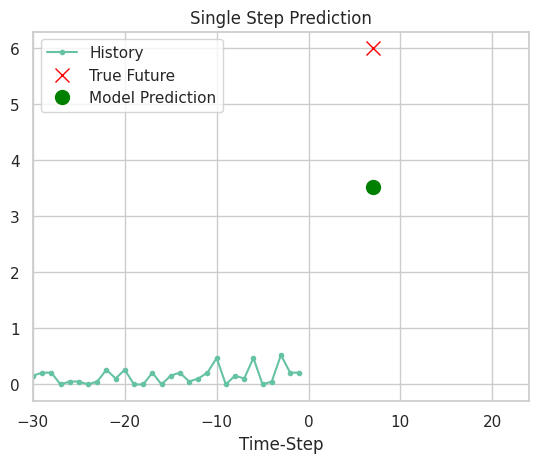

In [ ]:
for x, y in test_dataset.take(20):
    show_preds(
        [x[0][:, 1].numpy(), y[0].numpy(), best_lstm_model.predict(x)[0]],
        7,
        "Single Step Prediction",
    )

## GRU

In [ ]:
gru = gru_model(input_shape)
gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 32)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,209 (39.88 KB)

 Trainable params: 10,209 (39.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_gru = [
	tf.keras.callbacks.ModelCheckpoint(f'models/cats/best_gru_{get_time()}.keras', save_best_only=True)
]

In [ ]:
gru_history = gru.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callbacks_gru
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 29.3592 - mean_absolute_error: 3.6692 - mean_squared_error: 29.3592 - val_loss: 21.2626 - val_mean_absolute_error: 3.0912 - val_mean_squared_error: 21.2626
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 18.0819 - mean_absolute_error: 3.1218 - mean_squared_error: 18.0819 - val_loss: 19.5543 - val_mean_absolute_error: 3.0001 - val_mean_squared_error: 19.5543
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 18.9934 - mean_absolute_error: 3.2001 - mean_squared_error: 18.9934 - val_loss: 19.2211 - val_mean_absolute_error: 2.9843 - val_mean_squared_error: 19.2211
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 19.7074 - mean_absolute_error: 3.2032 - mean_squared_error: 19.7074 - val_loss: 18.6412 - val_mean_absolute_error: 2.9609 - val_mean_squared_error: 18.6412
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 18.0998 - mean_absolute_error: 3.1126 - mean_squared_error: 18.0998 - val_loss: 1

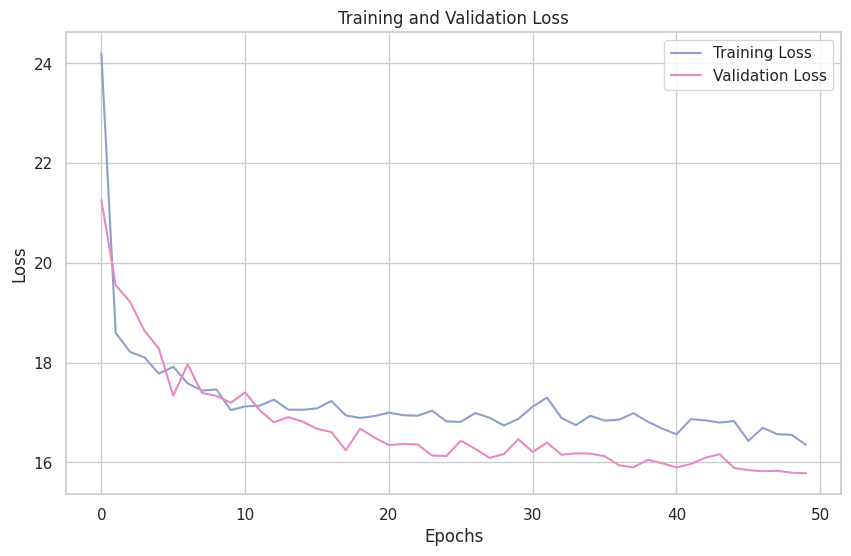

In [ ]:
plot_loss(gru_history)

In [ ]:
best_gru_model = tf.keras.models.load_model('models/cats/best_gru_2024-09-26_19-18.keras')
gru_cat_evaluation = best_gru_model.evaluate(test_dataset)
print("Test MSE: %.4f" % gru_cat_evaluation[1])
print("Test MAE: %.4f" % gru_cat_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.9031 - mean_absolute_error: 3.1716 - mean_squared_error: 18.9031
Test MSE: 18.2523
Test MAE: 3.1582


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


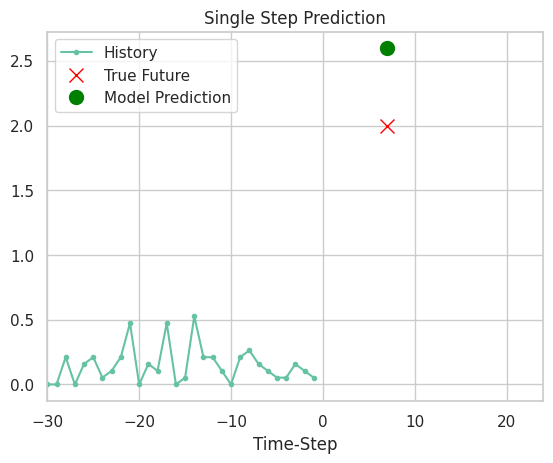

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


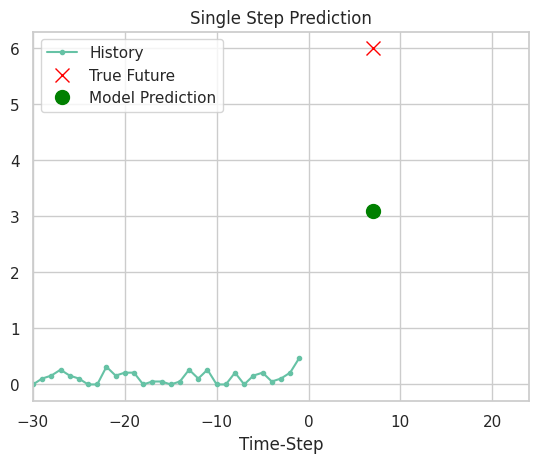

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


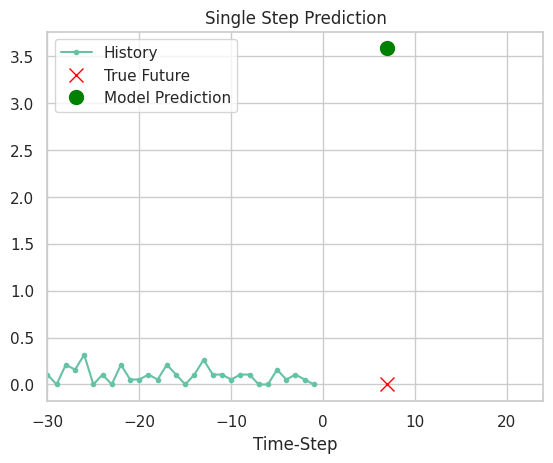

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


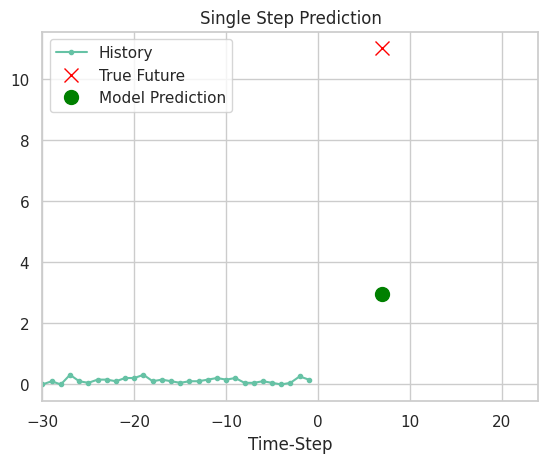

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


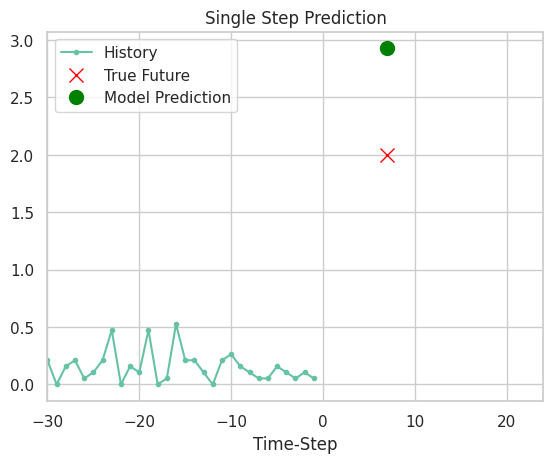

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


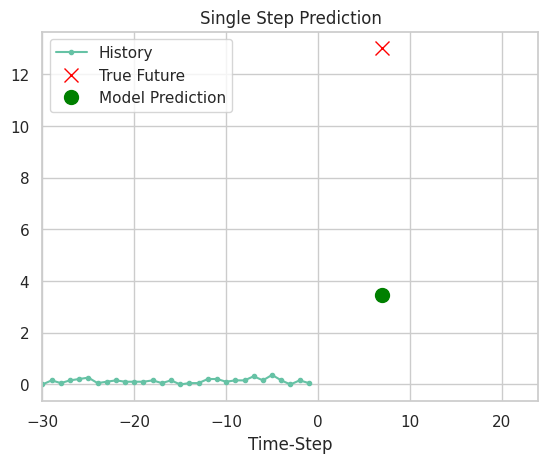

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


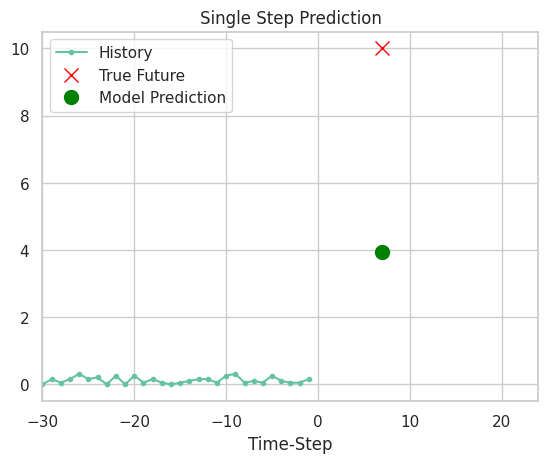

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


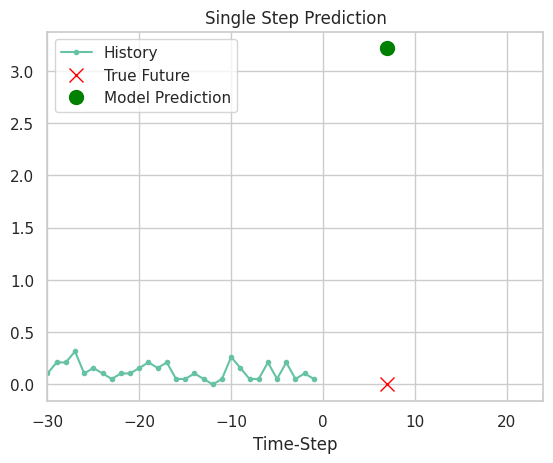

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


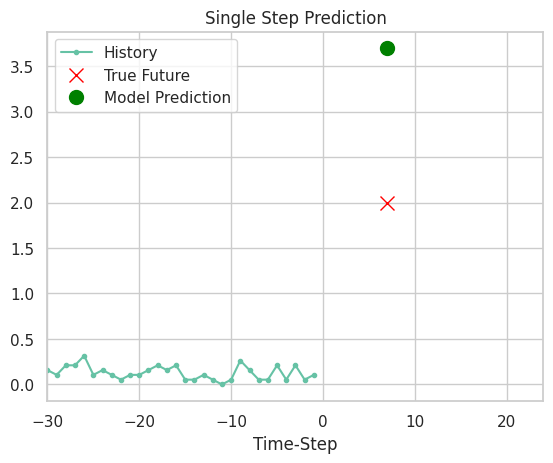

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


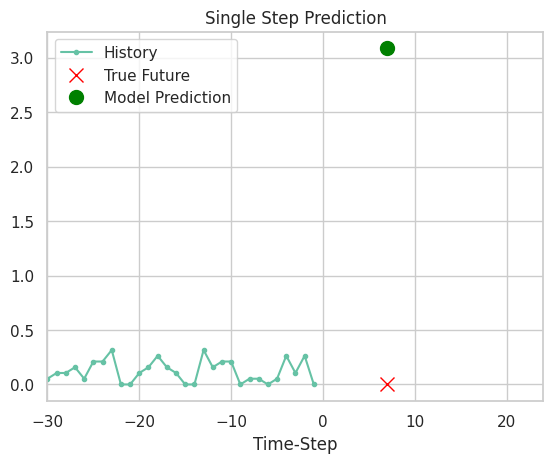

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


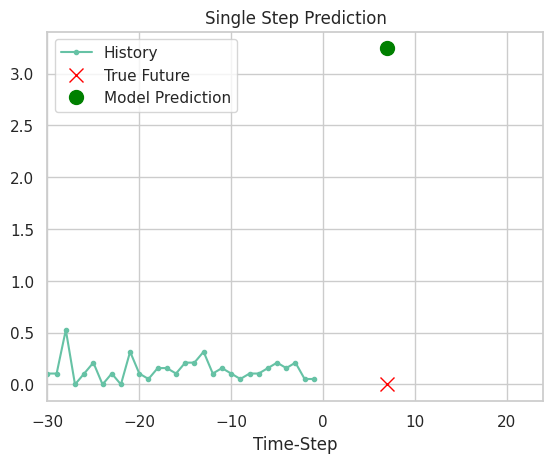

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


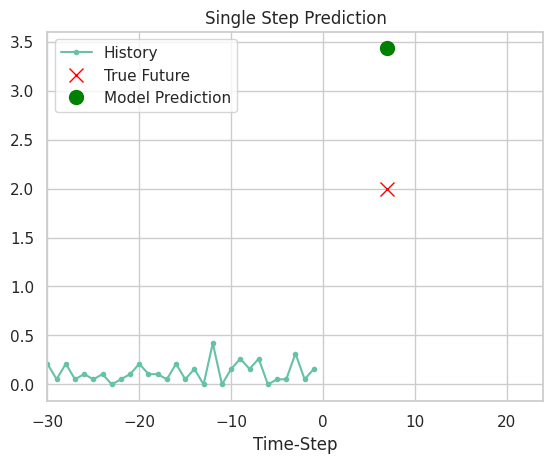

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


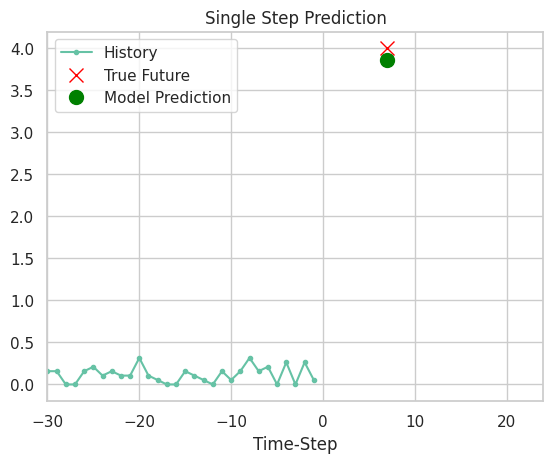

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


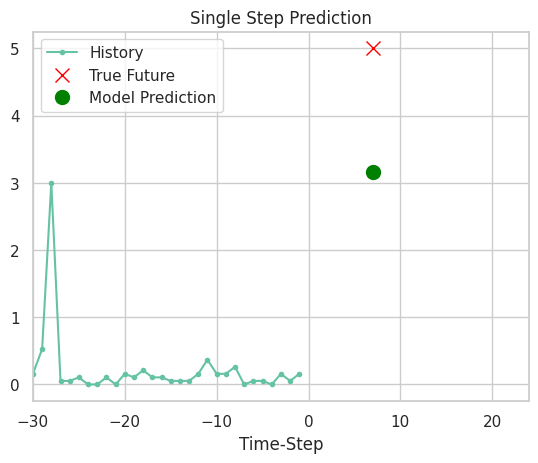

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


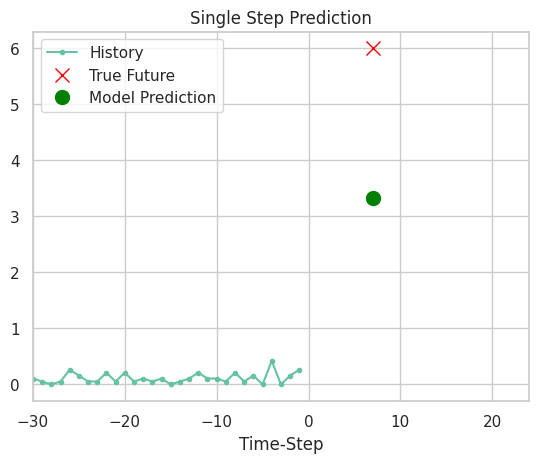

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


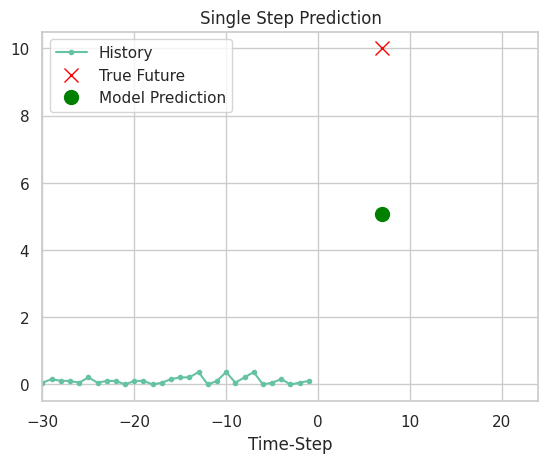

In [ ]:
for x, y in test_dataset.take(20):
    show_preds(
        [x[0][:, 1].numpy(), y[0].numpy(), best_gru_model.predict(x)[0]],
        7,
        "Single Step Prediction"
    )

# Predicción de 'Intake Dogs' 🐕

In [ ]:
input_shape_dogs = (sequence_length, x_train_dog.shape[-1])
print("Input Shape: %s" % str(input_shape_dogs))

Input Shape: (30, 8)


## Simple RNN

In [ ]:
simple_rnn_dog = simple_rnn_model(input_shape_dogs)
simple_rnn_dog.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 30, 32)              │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,425 (13.38 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_simple_dog = [
	tf.keras.callbacks.ModelCheckpoint(f'models/dogs/best_simple_dog_{get_time()}.keras', save_best_only=True)
]

In [ ]:
simple_dog_history = simple_rnn_dog.fit(
	train_dog_dataset,
	epochs=50,
	validation_data=val_dog_dataset,
	callbacks=callbacks_simple_dog
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 9.0315 - mean_absolute_error: 2.1139 - mean_squared_error: 9.0315 - val_loss: 5.9579 - val_mean_absolute_error: 1.8889 - val_mean_squared_error: 5.9579
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.8971 - mean_absolute_error: 1.8131 - mean_squared_error: 5.8971 - val_loss: 5.9824 - val_mean_absolute_error: 1.8987 - val_mean_squared_error: 5.9824
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9374 - mean_absolute_error: 1.8165 - mean_squared_error: 5.9374 - val_loss: 5.8664 - val_mean_absolute_error: 1.8708 - val_mean_squared_error: 5.8664
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.0777 - mean_absolute_error: 1.7983 - mean_squared_error: 6.0777 - val_loss: 5.7825 - val_mean_absolute_error: 1.8320 - val_mean_squared_error: 5.7825
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.3897 - mean_absolute_error: 1.7343 - mean_squared_error: 5.3897 - val_loss: 5.8831 - val_mean_a

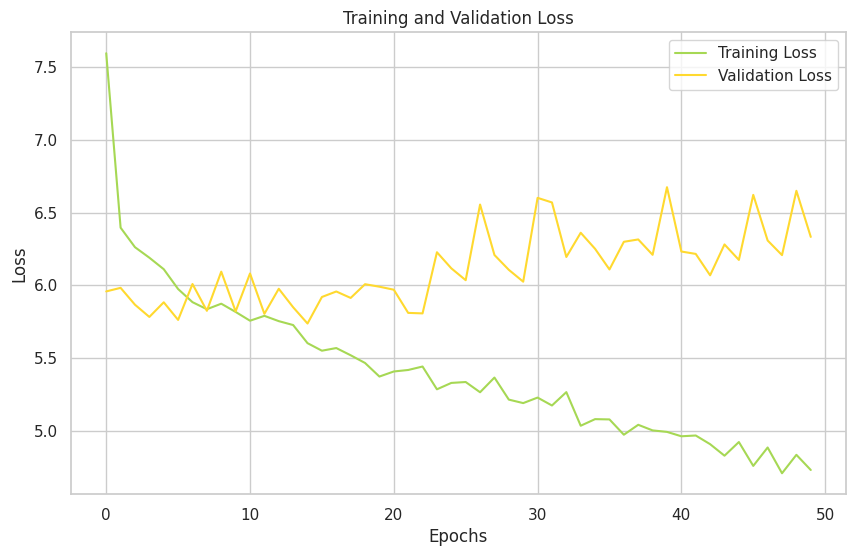

In [ ]:
plot_loss(simple_dog_history)

In [ ]:
best_simple_dog_model = tf.keras.models.load_model('models/dogs/best_simple_dog_2024-09-26_19-39.keras')
simple_dog_evaluation = best_simple_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % simple_dog_evaluation[1])
print("Test MAE: %.4f" % simple_dog_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2072 - mean_absolute_error: 1.9212 - mean_squared_error: 6.2072
Test MSE: 5.7424
Test MAE: 1.8410


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


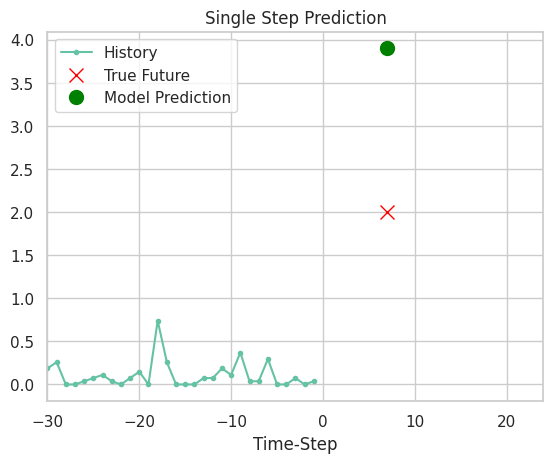

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


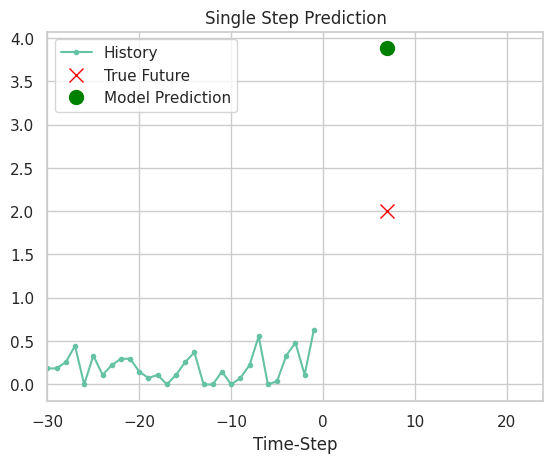

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


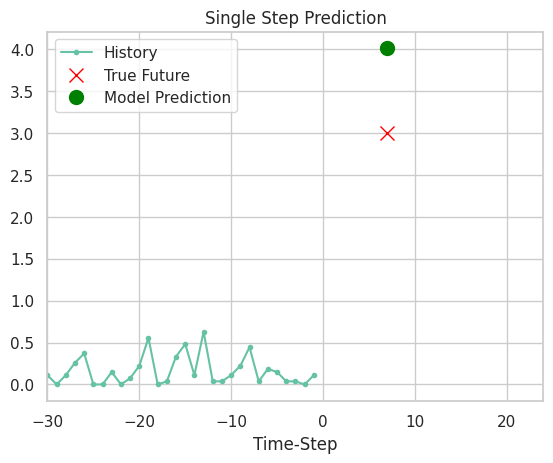

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


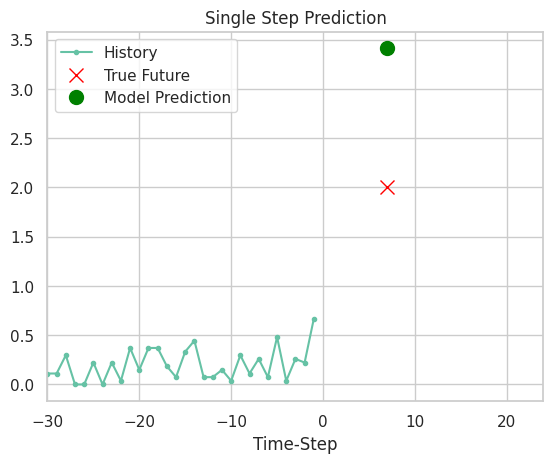

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


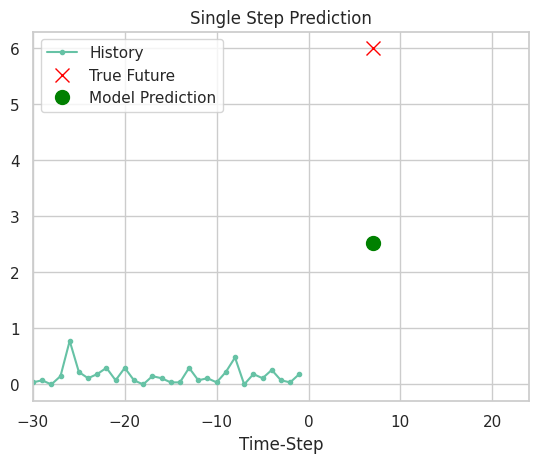

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


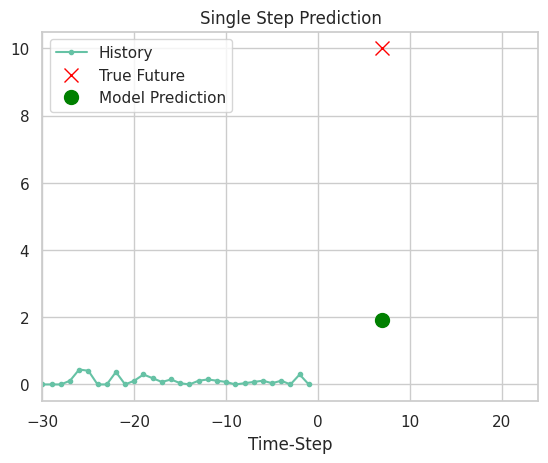

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


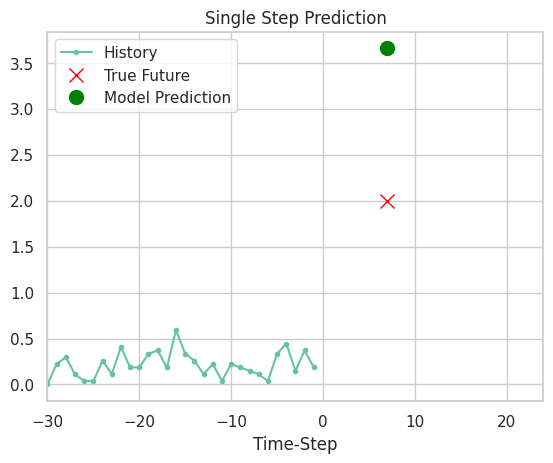

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


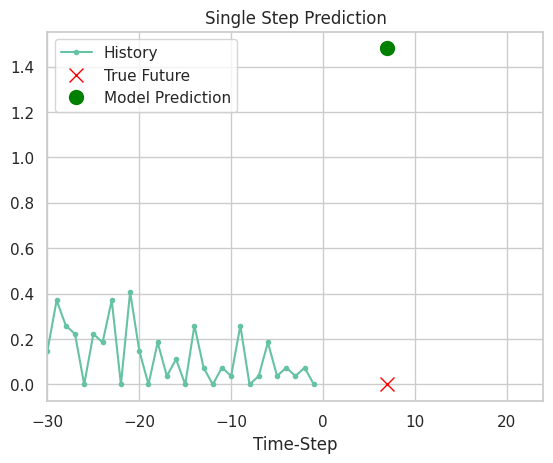

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


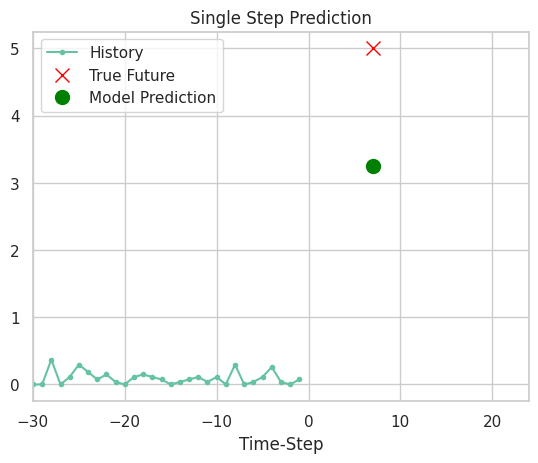

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


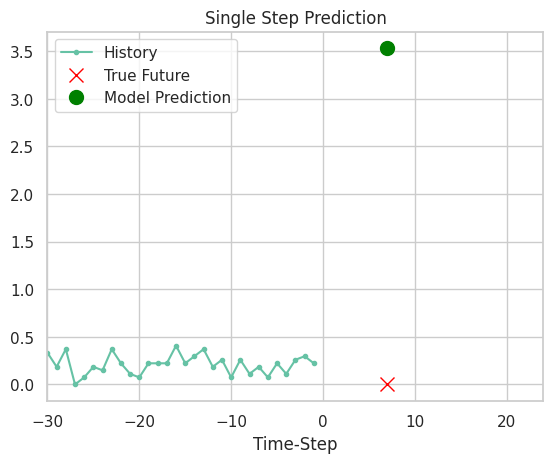

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


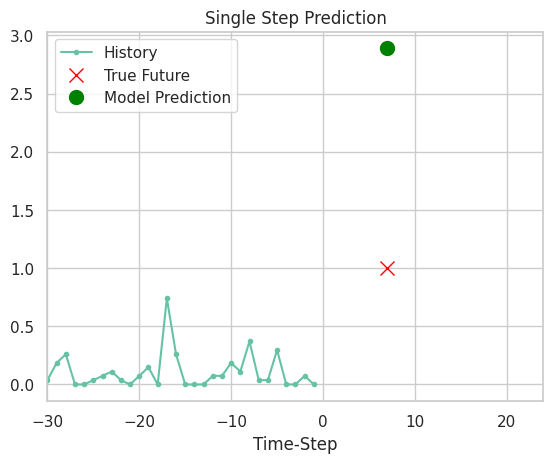

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


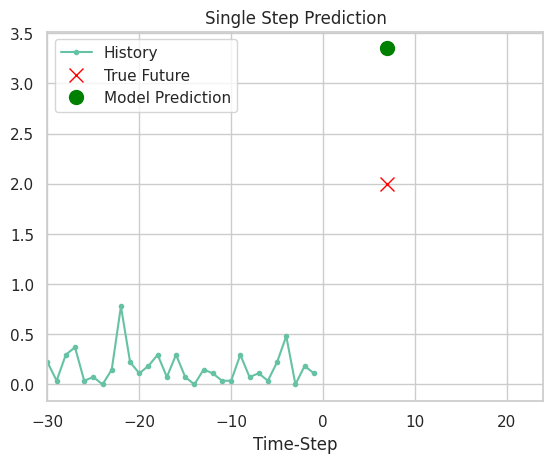

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


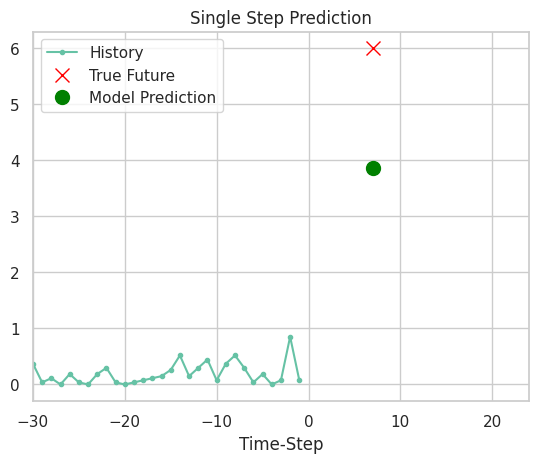

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


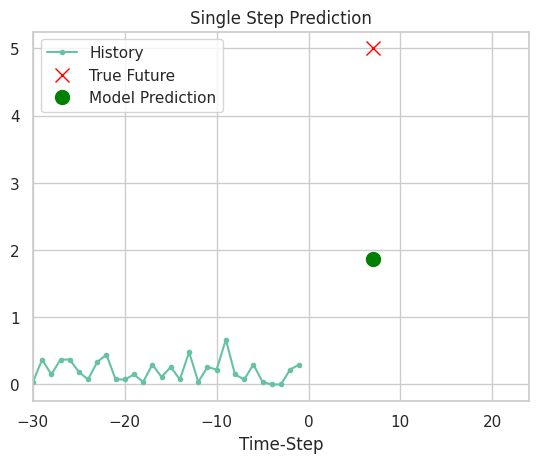

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


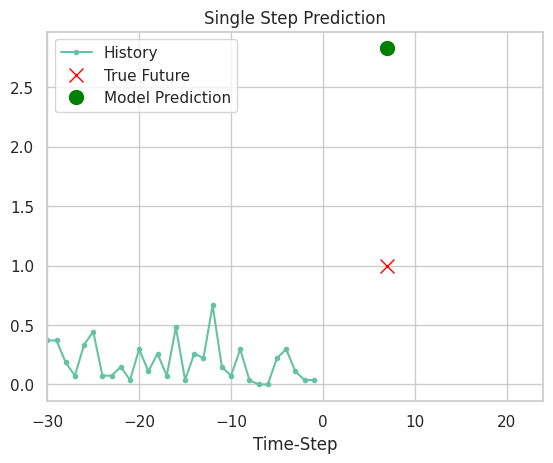

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


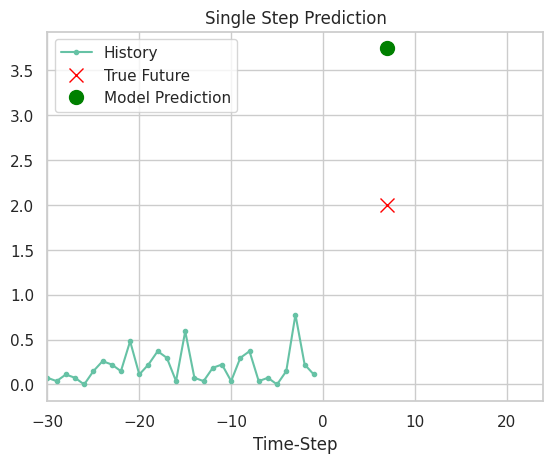

In [ ]:
for x, y in test_dog_dataset.take(20):
  show_preds(
    [x[0][:, 1].numpy(), y[0].numpy(), best_simple_dog_model.predict(x)[0]],
    7,
    "Single Step Prediction",
  )

## LSTM

In [ ]:
lstm_dog = lstm_model(input_shape_dogs)
lstm_dog.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 32)              │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,601 (53.13 KB)

 Trainable params: 13,601 (53.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_lstm_dog = [
	tf.keras.callbacks.ModelCheckpoint(f'models/dogs/best_lstm_dog_{get_time()}.keras', save_best_only=True)
]

In [ ]:
lstm_dog_history = lstm_dog.fit(
	train_dog_dataset,
	epochs=50,
	validation_data=val_dog_dataset,
	callbacks=callbacks_lstm_dog
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 9.9753 - mean_absolute_error: 2.2393 - mean_squared_error: 9.9753 - val_loss: 5.5352 - val_mean_absolute_error: 1.7686 - val_mean_squared_error: 5.5352
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.4415 - mean_absolute_error: 1.8660 - mean_squared_error: 6.4415 - val_loss: 5.6479 - val_mean_absolute_error: 1.8087 - val_mean_squared_error: 5.6479
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.4995 - mean_absolute_error: 1.8521 - mean_squared_error: 6.4995 - val_loss: 5.6181 - val_mean_absolute_error: 1.7978 - val_mean_squared_error: 5.6181
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.6615 - mean_absolute_error: 1.7410 - mean_squared_error: 5.6615 - val_loss: 5.5673 - val_mean_absolute_error: 1.7805 - val_mean_squared_error: 5.5673
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.5869 - mean_absolute_error: 1.7273 - mean_squared_error: 5.5869 - val_loss: 5.5483 - val_mean_a

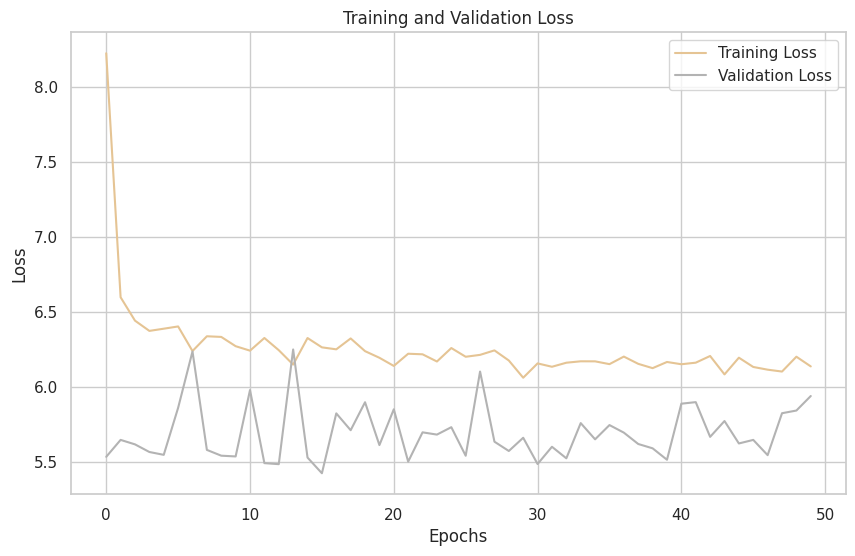

In [ ]:
plot_loss(lstm_dog_history)

In [ ]:
best_lstm_dog_model = tf.keras.models.load_model('models/dogs/best_lstm_dog_2024-09-26_19-42.keras')
lstm_dog_evaluation = best_lstm_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % lstm_dog_evaluation[1])
print("Test MAE: %.4f" % lstm_dog_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3423 - mean_absolute_error: 1.8350 - mean_squared_error: 6.3423
Test MSE: 5.3046
Test MAE: 1.7156


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


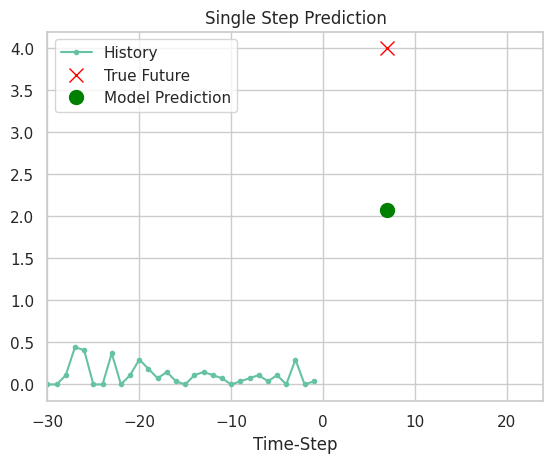

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


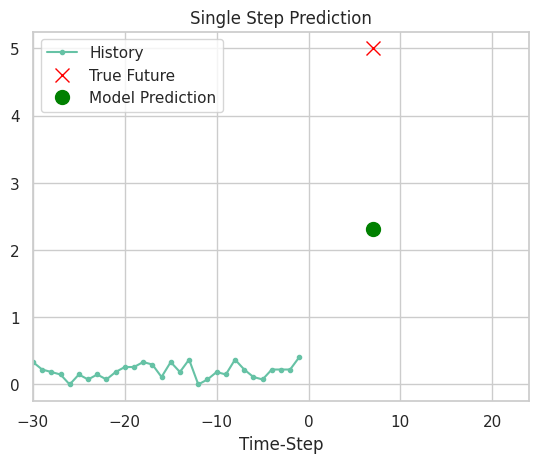

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


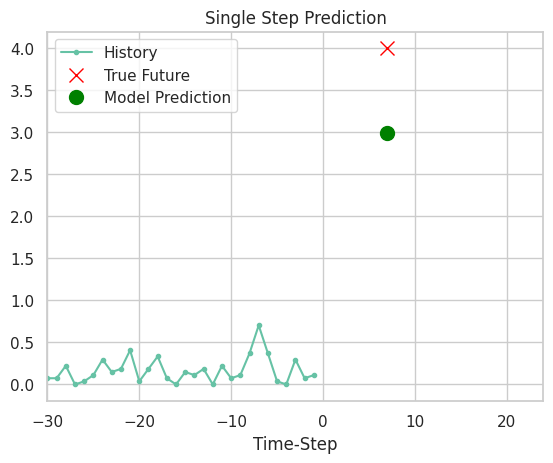

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


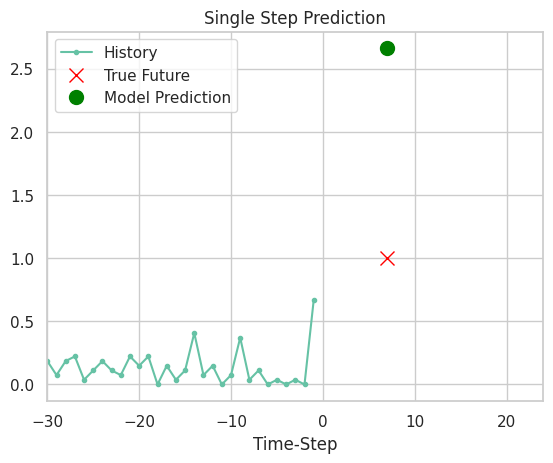

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


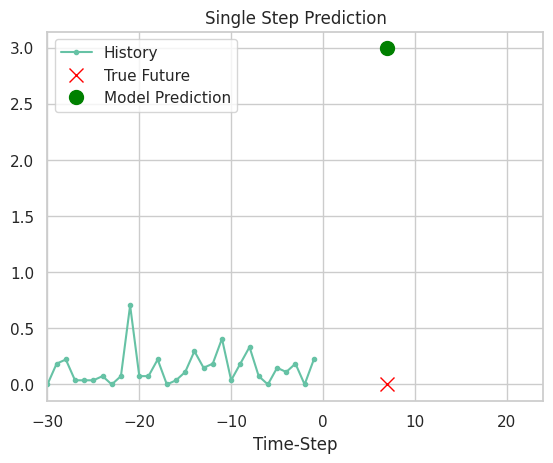

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


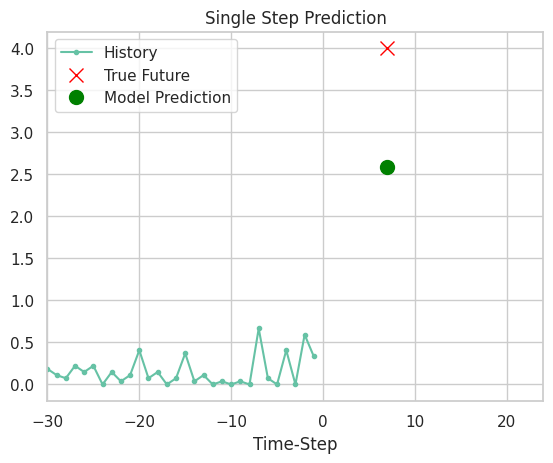

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


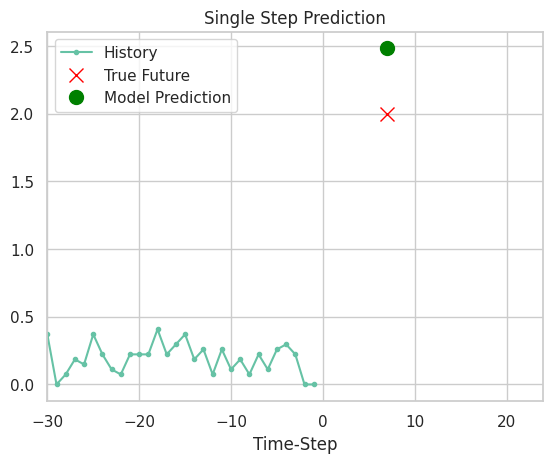

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


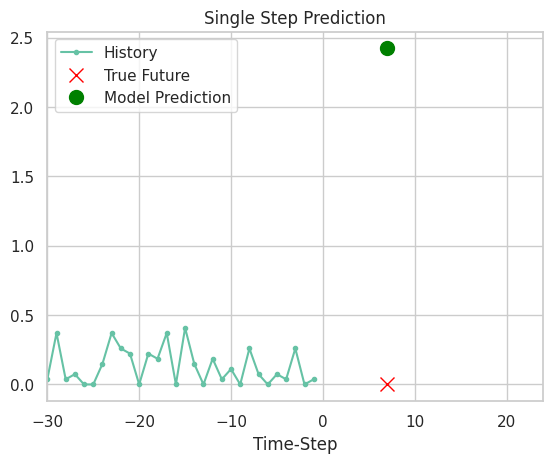

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


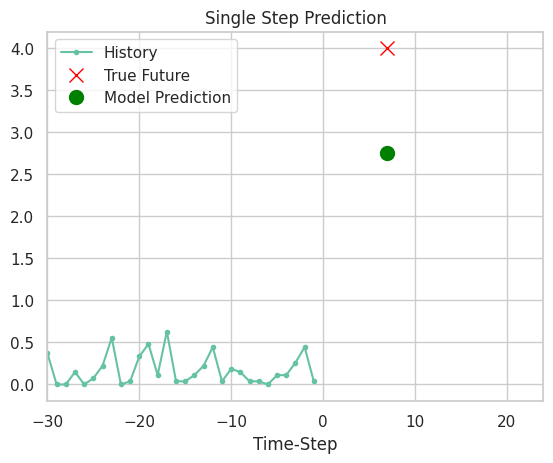

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


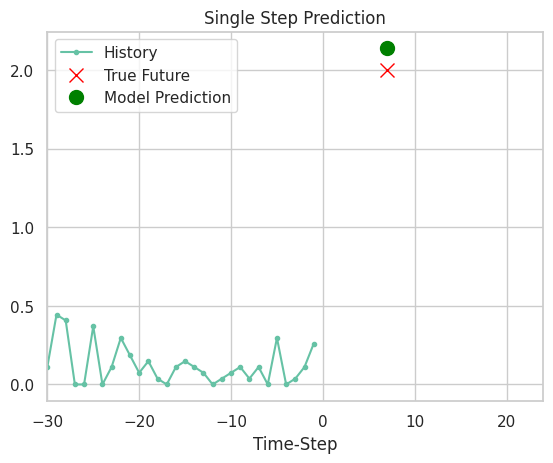

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


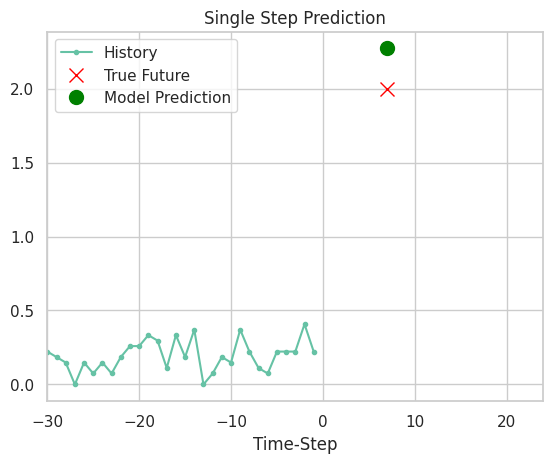

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


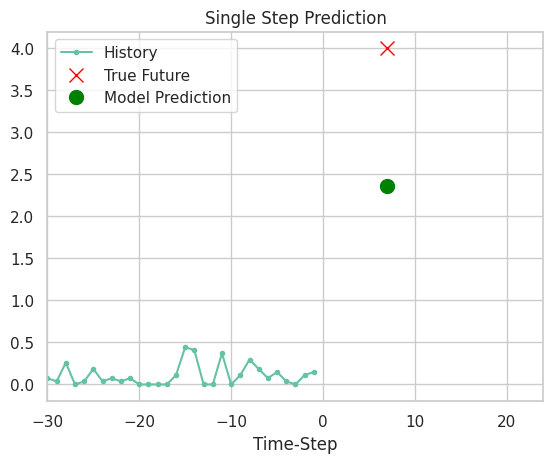

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


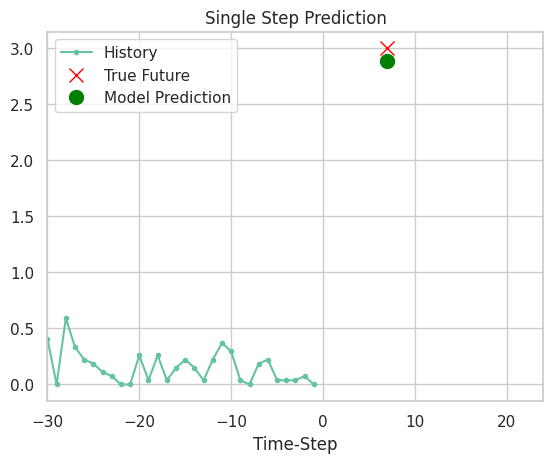

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


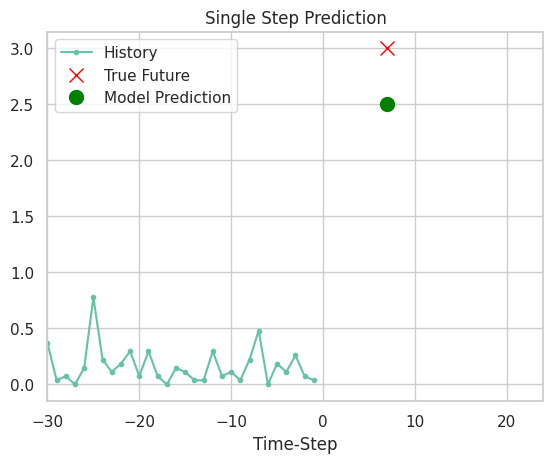

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


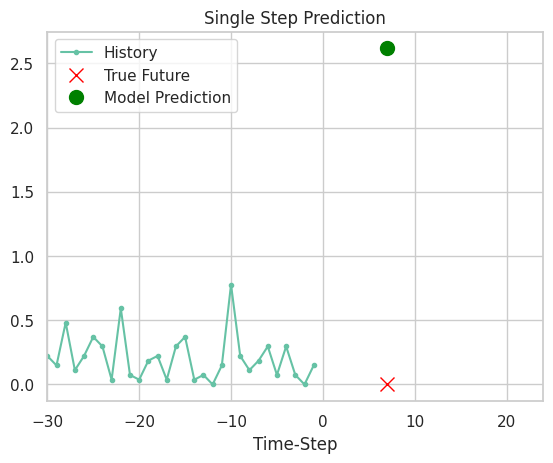

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


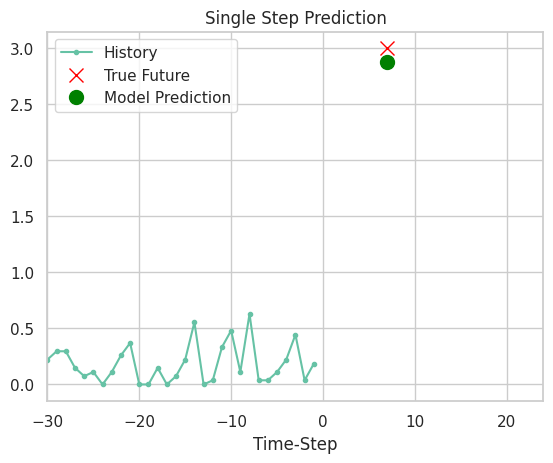

In [ ]:
for x, y in test_dog_dataset.take(20):
  show_preds(
    [x[0][:, 1].numpy(), y[0].numpy(), best_lstm_dog_model.predict(x)[0]],
    7,
    "Single Step Prediction",
  )

## GRU

In [ ]:
gru_dog = lstm_model(input_shape_dogs)
gru_dog.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 32)              │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,601 (53.13 KB)

 Trainable params: 13,601 (53.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_gru_dog = [
	# tf.keras.callbacks.EarlyStopping(patience=2),
	tf.keras.callbacks.ModelCheckpoint(f'models/dogs/best_gru_dog_{get_time()}.keras', save_best_only=True)
]

In [ ]:
gru_dog_history = gru_dog.fit(
	train_dog_dataset,
	epochs=50,
	validation_data=val_dog_dataset,
	callbacks=callbacks_gru_dog
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 9.8471 - mean_absolute_error: 2.2169 - mean_squared_error: 9.8471 - val_loss: 5.6817 - val_mean_absolute_error: 1.8170 - val_mean_squared_error: 5.6817
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.2809 - mean_absolute_error: 1.8341 - mean_squared_error: 6.2809 - val_loss: 5.8593 - val_mean_absolute_error: 1.8646 - val_mean_squared_error: 5.8593
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 6.2062 - mean_absolute_error: 1.8512 - mean_squared_error: 6.2062 - val_loss: 5.5256 - val_mean_absolute_error: 1.7612 - val_mean_squared_error: 5.5256
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.8029 - mean_absolute_error: 1.7767 - mean_squared_error: 5.8029 - val_loss: 5.8661 - val_mean_absolute_error: 1.8695 - val_mean_squared_error: 5.8661
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.2444 - mean_absolute_error: 1.8169 - mean_squared_error: 6.2444 - val_loss: 5.9756 - val_mean_a

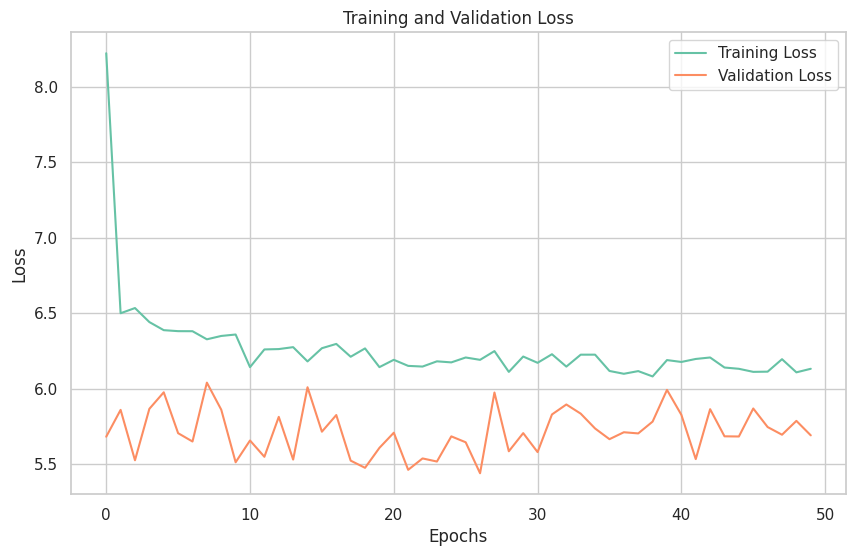

In [ ]:
plot_loss(gru_dog_history)

In [ ]:
best_gru_dog_model = tf.keras.models.load_model('models/dogs/best_gru_dog2024-09-26_19-46.keras')
gru_dog_evaluation = best_gru_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % gru_dog_evaluation[1])
print("Test MAE: %.4f" % gru_dog_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7610 - mean_absolute_error: 1.8591 - mean_squared_error: 6.7610
Test MSE: 5.3206
Test MAE: 1.7094


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


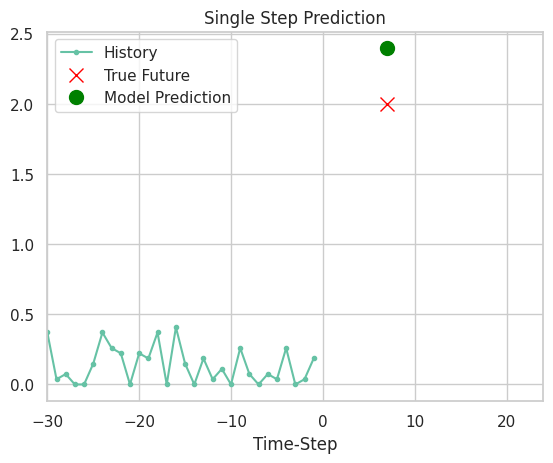

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


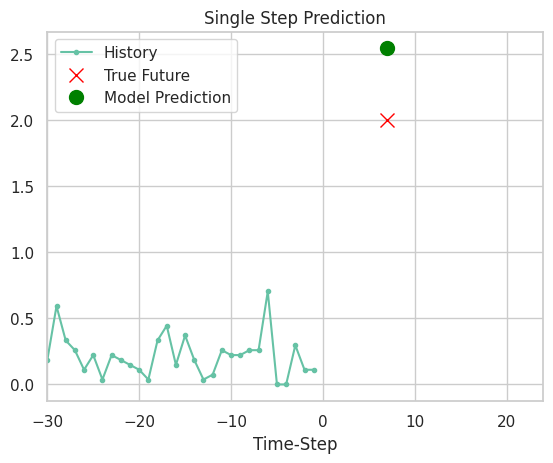

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


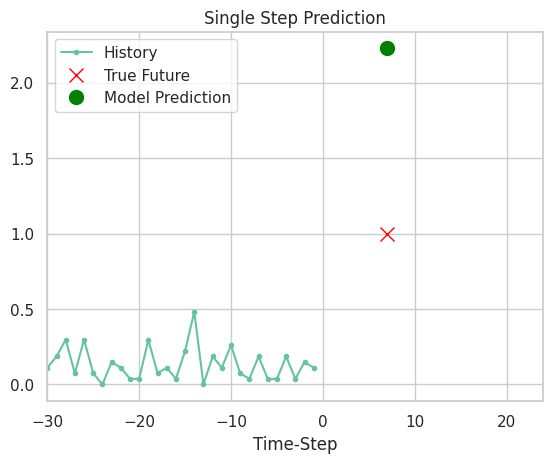

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


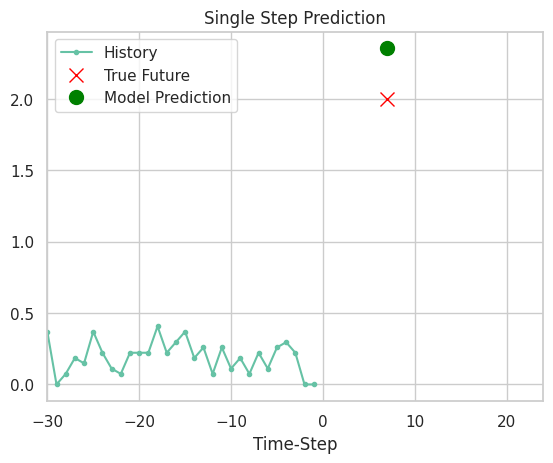

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


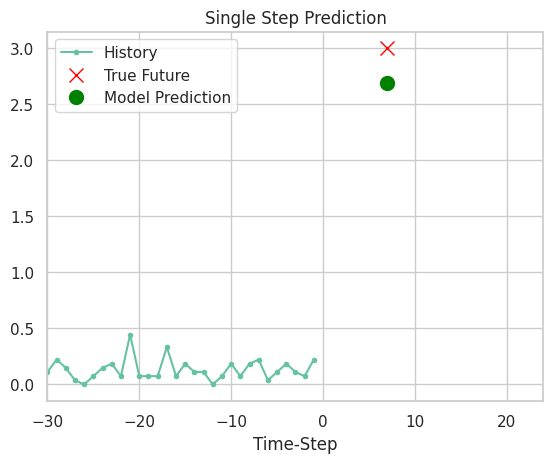

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


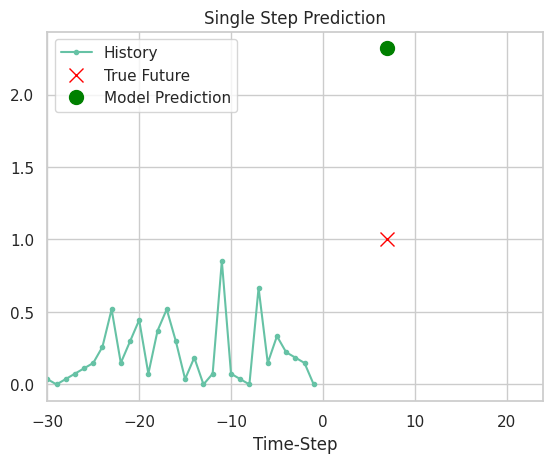

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


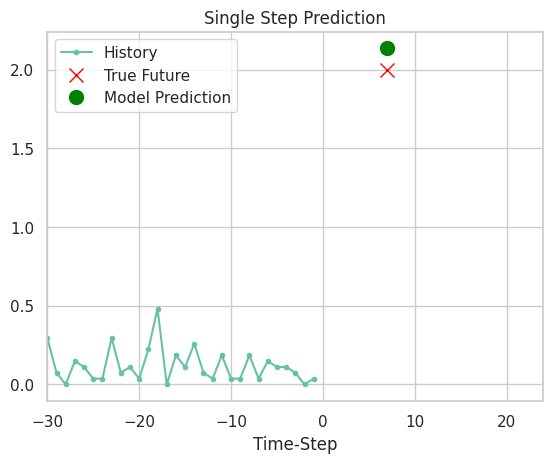

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


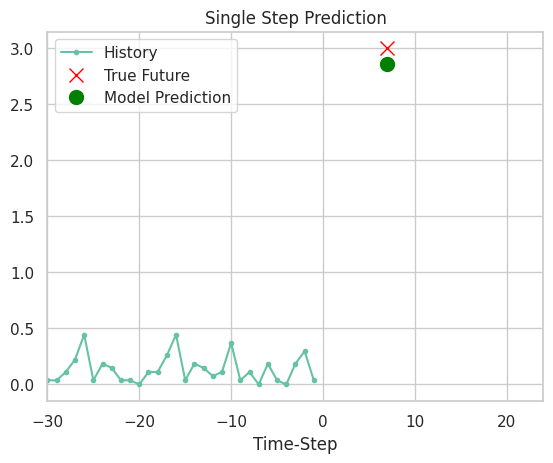

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


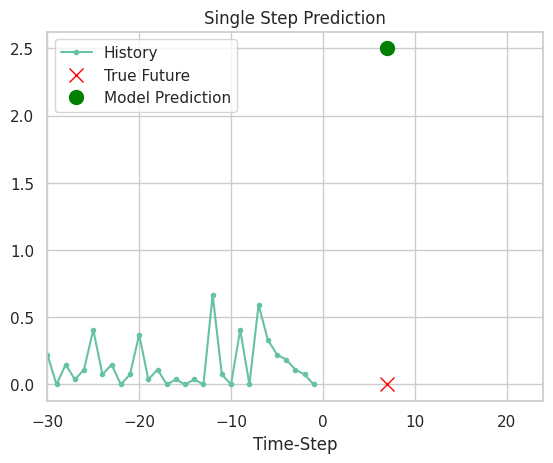

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


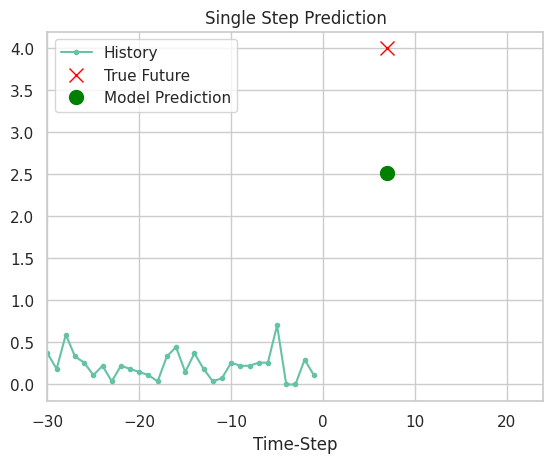

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


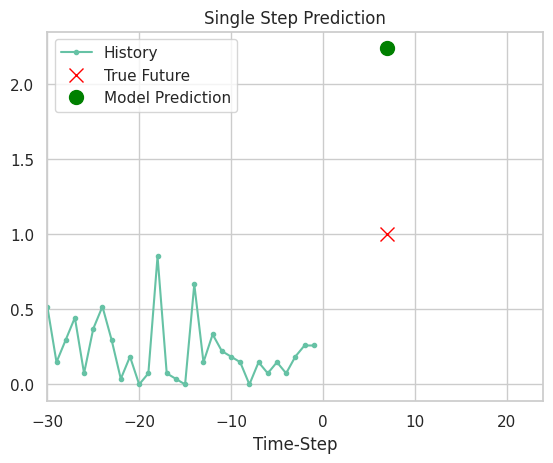

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


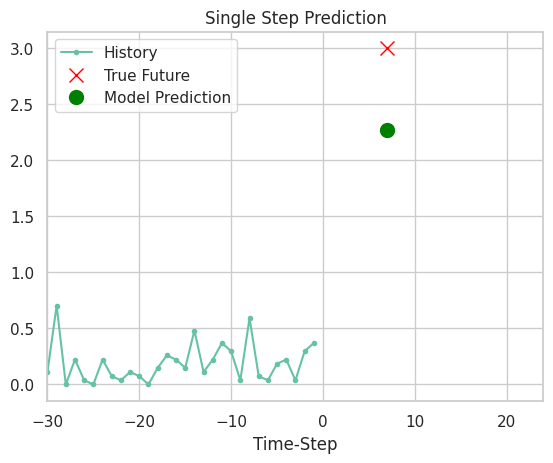

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


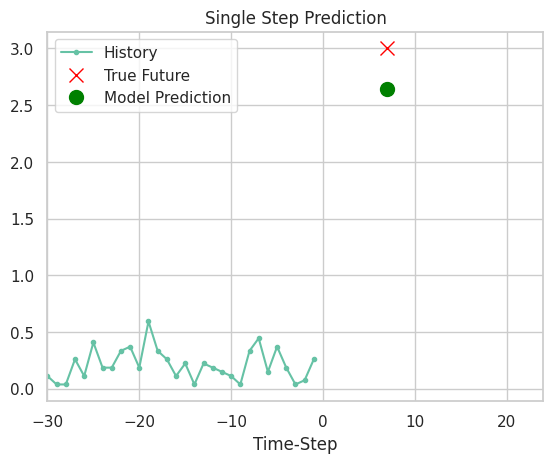

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


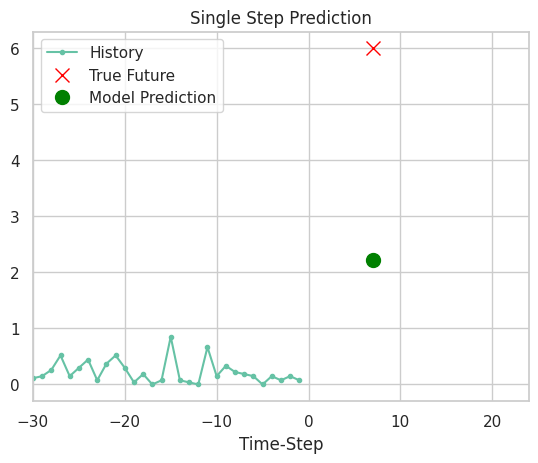

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


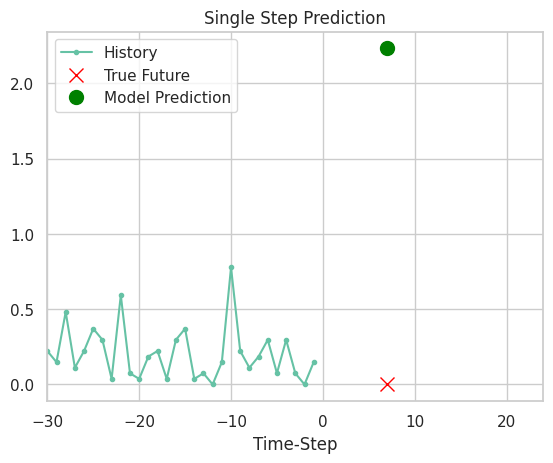

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


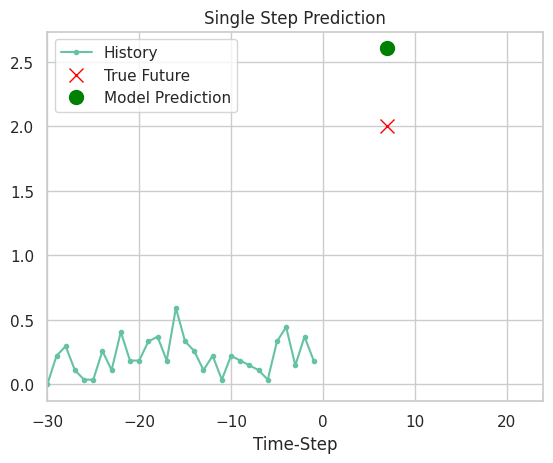

In [138]:
for x, y in test_dog_dataset.take(20):
    show_preds(
        [x[0][:, 1].numpy(), y[0].numpy(), best_gru_dog_model.predict(x)[0]],
        7,
        "Single Step Prediction",
    )

# Otras Predicciones / Modelos

- sequence_length = 15
- sampling_rate = 1

In [121]:
input_shape = (sequence_length, x_train.shape[-1])
print("Input Shape: %s" % str(input_shape))

model_1 = lstm_model(input_shape)
model_1.summary()

Input Shape: (15, 6)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 15, 32)              │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,345 (52.13 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
callback_model_1 = [
	tf.keras.callbacks.ModelCheckpoint(f'models/cats/best_model_1_{get_time()}.keras', save_best_only=True)
]

In [122]:
model_1_history = model_1.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callback_model_1
)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 29.3508 - mean_absolute_error: 3.7409 - mean_squared_error: 29.3508 - val_loss: 17.0098 - val_mean_absolute_error: 3.1954 - val_mean_squared_error: 17.0098
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 16.9152 - mean_absolute_error: 3.1259 - mean_squared_error: 16.9152 - val_loss: 16.4677 - val_mean_absolute_error: 2.9988 - val_mean_squared_error: 16.4677
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 17.8448 - mean_absolute_error: 3.1141 - mean_squared_error: 17.8448 - val_loss: 16.2545 - val_mean_absolute_error: 2.9558 - val_mean_squared_error: 16.2545
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 17.9511 - mean_absolute_error: 3.1173 - mean_squared_error: 17.9511 - val_loss: 16.2230 - val_mean_absolute_error: 3.0200 - val_mean_squared_error: 16.2230
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 15.9115 - mean_absolute_error: 3.0136 - mean_squared_error: 15.9115 - val_loss: 1

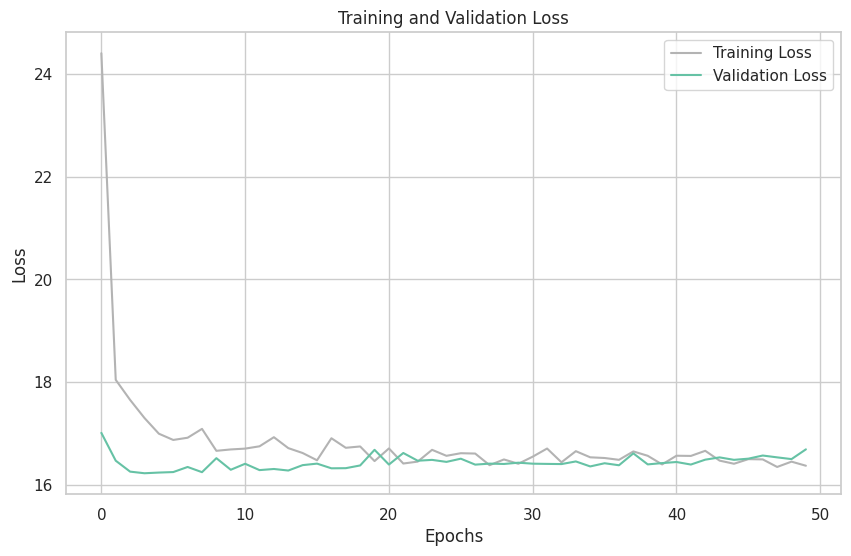

In [123]:
plot_loss(model_1_history)

In [125]:
best_model_1 = tf.keras.models.load_model('models/cats/best_model_1_2024-09-26_23-29.keras')
model_1_evaluation = best_model_1.evaluate(test_dataset)
print("Test MSE: %.4f" % model_1_evaluation[1])
print("Test MAE: %.4f" % model_1_evaluation[2])

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 18.0425 - mean_absolute_error: 3.2449 - mean_squared_error: 18.0425
Test MSE: 17.8618
Test MAE: 3.3010


In [128]:
model_2 = gru_model(input_shape)
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 15, 64)              │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,849 (151.75 KB)

 Trainable params: 38,849 (151.75 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
callback_model_2 = [
	tf.keras.callbacks.ModelCheckpoint(f'models/cats/best_model_2_{get_time()}.keras', save_best_only=True)
]

In [130]:
model_2_history = model_2.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callback_model_2
)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 26.0621 - mean_absolute_error: 3.6215 - mean_squared_error: 26.0621 - val_loss: 20.7868 - val_mean_absolute_error: 3.0324 - val_mean_squared_error: 20.7868
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 17.9686 - mean_absolute_error: 3.1670 - mean_squared_error: 17.9686 - val_loss: 20.7880 - val_mean_absolute_error: 3.0296 - val_mean_squared_error: 20.7880
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 17.4780 - mean_absolute_error: 3.0820 - mean_squared_error: 17.4780 - val_loss: 18.9487 - val_mean_absolute_error: 2.9505 - val_mean_squared_error: 18.9487
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 17.1087 - mean_absolute_error: 3.1004 - mean_squared_error: 17.1087 - val_loss: 19.7407 - val_mean_absolute_error: 2.9774 - val_mean_squared_error: 19.7407
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 16.7421 - mean_absolute_error: 3.0351 - mean_squared_error: 16.7421 - val_loss: 2

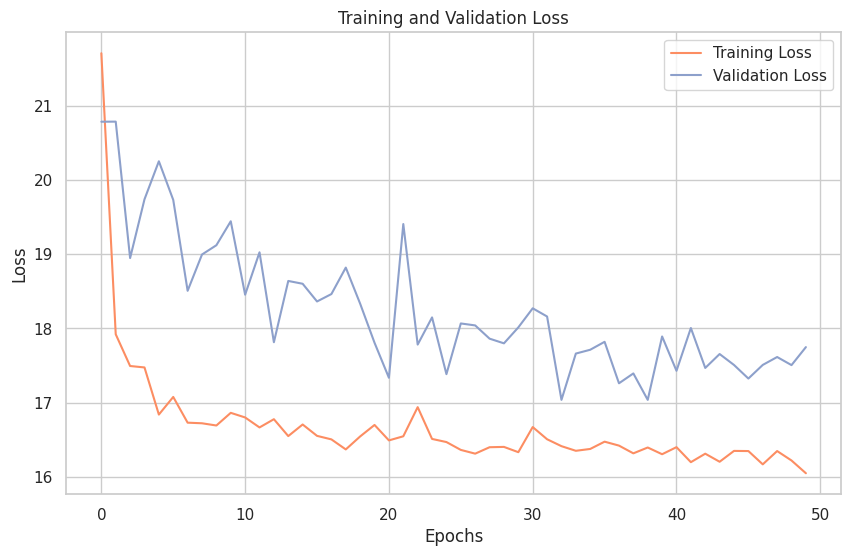

In [131]:
plot_loss(model_2_history)

In [133]:
best_model_2 = tf.keras.models.load_model('models/cats/best_model_2_2024-09-26_23-36.keras')
evaluation_model_2 = best_model_2.evaluate(test_dataset)
print("Test MSE: %.4f" % evaluation_model_2[1])
print("Test MAE: %.4f" % evaluation_model_2[2])

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 17.6657 - mean_absolute_error: 3.0053 - mean_squared_error: 17.6657
Test MSE: 18.8803
Test MAE: 3.1258


# Helpers 🧰


In [ ]:
def get_time():
  date = datetime.datetime.now()
  return date.strftime("%Y-%m-%d_%H-%M")

## Data Helpers

In [ ]:
def transform_data(dataframe: pd.DataFrame) -> pd.DataFrame:
	"""
	Transform the dataframe to a format that can be used for time series analysis
	:param dataframe: The dataframe to transform
	:return: The transformed dataframe
	"""

	# Tomo las columnas de interés para el análisis de series de tiempo: 'Intake DateTime', 'Movement DateTime', 'Return DateTime' y 'Deceased DateTime'.

	df_intake = dataframe[['Intake DateTime', 'Species Name', 'ID']].copy()
	df_intake = df_intake.drop_duplicates()  # eliminar las filas duplicadas

	df_movement = dataframe[['Movement DateTime', 'Species Name', 'ID']].copy()
	df_movement = df_movement.drop_duplicates()
	df_movement = df_movement.dropna()

	df_return = dataframe[['Return DateTime', 'Species Name', 'ID']].copy()
	df_return = df_return.drop_duplicates()
	df_return = df_return.dropna()

	df_deceased = dataframe[['Deceased DateTime', 'Species Name', 'ID']].copy()
	df_deceased = df_deceased.drop_duplicates()
	df_deceased = df_deceased.dropna()

	# Calculo la cantidad de perros y gatos que ingresaron/egresaron/fueron retornados/fallecieron por día.
	df_grouped_intake = df_intake.groupby(['Intake DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_intake.columns = df_grouped_intake.rename(columns={'Cat': 'Intake Cats', 'Dog': 'Intake Dogs'}).columns

	df_grouped_movement = df_movement.groupby(['Movement DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_movement.columns = df_grouped_movement.rename(columns={'Cat': 'Moved Cats', 'Dog': 'Moved Dogs'}).columns

	df_grouped_return = df_return.groupby(['Return DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_return.columns = df_grouped_return.rename(columns={'Cat': 'Returned Cats', 'Dog': 'Returned Dogs'}).columns

	df_grouped_deceased = df_deceased.groupby(['Deceased DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_deceased.columns = df_grouped_deceased.rename(columns={'Cat': 'Deceased Cats', 'Dog': 'Deceased Dogs'}).columns

	# Agrupo a todos los registros en un solo DataFrame

	# Reseteo los índices para poder concatenar los DataFrames en la fecha
	df_grouped_intake_reset = df_grouped_intake.reset_index()
	df_grouped_movement_reset = df_grouped_movement.reset_index()
	df_grouped_return_reset = df_grouped_return.reset_index()
	df_grouped_deceased_reset = df_grouped_deceased.reset_index()

	# Renombro las columnas para que tengan el mismo nombre
	df_grouped_intake_rename = df_grouped_intake_reset.rename(columns={'Intake DateTime': 'Date'})
	df_grouped_movement_rename = df_grouped_movement_reset.rename(columns={'Movement DateTime': 'Date'})
	df_grouped_return_rename = df_grouped_return_reset.rename(columns={'Return DateTime': 'Date'})
	df_grouped_deceased_rename = df_grouped_deceased_reset.rename(columns={'Deceased DateTime': 'Date'})

	df_grouped = pd.merge(df_grouped_intake_rename, df_grouped_movement_rename, on='Date', how='outer')
	df_grouped = pd.merge(df_grouped, df_grouped_return_rename, on='Date', how='outer')
	df_grouped = pd.merge(df_grouped, df_grouped_deceased_rename, on='Date', how='outer')

	df_grouped = df_grouped.fillna(0)
	df_grouped = df_grouped.set_index('Date', drop=True)
	df_grouped.index = pd.to_datetime(df_grouped.index)

	return df_grouped

## Plot Helpers 🎨

In [ ]:
palette = sns.color_palette("Set2")
sns.set_theme(style='whitegrid', palette=palette)

def color_iterator(palette):
    """Function that iterates through the colors and starts over when reaching the end."""
    while True:
        for color in palette:
            yield color

palette_iter = color_iterator(palette)

In [ ]:
def plot_series(dataframe: pd.DataFrame, title: str):
  """
  Plot the series of the dataframe
  :param dataframe: The dataframe to plot
  :param title: The title of the plot
  :return: None
  """

  plt.figure(figsize=(10, 6))
  sns.lineplot(data=dataframe, dashes=False)
  plt.title(title)
  plt.xlabel('Date')
  plt.ylabel('Quantity')
  plt.show()

In [ ]:
def plot_category(dataframe: pd.DataFrame, category: str, title: str):
	"""
	Plot a single category from the dataframe
	:param dataframe: The dataframe to plot
	:param category: The category to plot
	:param title: The title of the plot
	:return: None
	"""

	plt.figure(figsize=(10, 6))
	sns.lineplot(data=dataframe, y=category, x=dataframe.index, color = next(palette_iter))
	plt.title(title)
	plt.xlabel('Date')
	plt.ylabel('Quantity')
	plt.show()

In [ ]:
def plot_cat_categories(dataframe: pd.DataFrame):
	"""
	Plot the categories related to cats from the dataframe
	:param dataframe: The dataframe to plot
	:return: None
	"""
	sns.set_theme(style='whitegrid', palette='Set2')

	fig, axs = plt.subplots(2, 2, figsize=(10, 6))
	sns.lineplot(data=dataframe, y='Intake Cats', x=dataframe.index, ax=axs[0, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Moved Cats', x=dataframe.index, ax=axs[0, 1], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Returned Cats', x=dataframe.index, ax=axs[1, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Deceased Cats', x=dataframe.index, ax=axs[1, 1], color = next(palette_iter))
	plt.tight_layout()
	plt.show()

In [ ]:
def plot_dog_categories(dataframe: pd.DataFrame):
	"""
	Plot the categories regarding dogs of the dataframe
	:param dataframe: The dataframe to plot
	:return: None
	"""
	sns.set_theme(style='whitegrid', palette='Set2')

	fig, axs = plt.subplots(2, 2, figsize=(10, 6))
	sns.lineplot(data=dataframe, y='Intake Dogs', x=dataframe.index, ax=axs[0, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Moved Dogs', x=dataframe.index, ax=axs[0, 1], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Returned Dogs', x=dataframe.index, ax=axs[1, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Deceased Dogs', x=dataframe.index, ax=axs[1, 1], color = next(palette_iter))
	plt.title('Dogs')
	plt.tight_layout()
	plt.show()


In [ ]:
def boxplot(dataframe: pd.DataFrame, title: str):
	"""
	Plot the boxplot of the dataframe
	:param dataframe: The dataframe to plot
	:param title: The title of the plot
	:return: None
	"""

	plt.figure(figsize=(14, 6))
	sns.boxplot(data=dataframe, orient='v')

	plt.xlabel('Category')
	plt.ylabel('Quantity')
	plt.show()

In [ ]:
def compare_boxplots(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame, category: str, title:str):
	"""
	Compare the boxplots of the three dataframes
	:param df1: The first dataframe
	:param df2: The second dataframe
	:param df3: The third dataframe
	:param category: The category to compare
	:param title: The title of the plot
	:return: None
	"""

	fig, axs = plt.subplots(1, 3, figsize=(10, 6))
	sns.boxplot(data=df1, y=category, orient='v', ax=axs[0], color = next(palette_iter))
	axs[0].set_title('Original')
	axs[0].set_ylabel('Quantity')
	sns.boxplot(data=df2, y=category, orient='v', ax=axs[1], color = next(palette_iter))
	axs[1].set_title('Daily')
	axs[1].set_ylabel('Quantity')
	sns.boxplot(data=df3, y=category, orient='v', ax=axs[2], color = next(palette_iter))
	axs[2].set_title('Weekly')
	axs[2].set_ylabel('Quantity')

	plt.tight_layout()
	plt.show()

In [ ]:
def plot_loss(history):
	# plt.plot(history.history['loss'], label='Training Loss')
	# plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=history.history['loss'], label='Training Loss', color = next(palette_iter))
  sns.lineplot(data=history.history['val_loss'], label='Validation Loss', color = next(palette_iter))
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
# plot autocorrelation
def plot_autocorrelation(df: pd.DataFrame, feature: str, lags: int):
  plot_acf(df[feature], lags=lags)
  plt.title(f'Autocorrelation of {feature} with lag={lags}')
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.show()

### Predictions

In [140]:
def show_preds(plot_data, delta, title, scaler=None):
    """
    Show the predictions of the model
    :param plot_data: The data to plot
    :param delta: The delta of the prediction
    :param title: The title of the plot
    :param scaler: The scaler to use
    :return: None
    """
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])

    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


# for x, y in test_dataset.take(10):
#     show_plot(
#         [x[0][:, 1].numpy(), y[0].numpy(), best_gru_model.predict(x)[0]],
#         12,
#         "Single Step Prediction",
# )